In [2]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
from scipy import  stats
filename1 = 'BATADAL_dataset_train.csv'
dataset1 = pd.read_csv(filename1)
get_ipython().magic(u'matplotlib inline')
from __future__ import division

In [3]:
filename2 = 'BATADAL_dataset_optimize.csv'
dataset2 = pd.read_csv(filename2)
filename3 = 'labeled_test_data.csv'
dataset3 = pd.read_csv(filename3)

The BATtle of the Attack Detection ALgorithms (BATADAL) will objectively compare the performance of algorithms for the detection of cyber attacks in water distribution systems. Participants will contribute an attack detection algorithm for a given water network following a set of rules that determine the exact goal of the algorithms.

Note: the flow data unit is LPS, pressure and water level units are meters.

Training Dataset 1: This dataset was released on November 20 2016, and it was generated from a one-year long simulation. The dataset does not contain any attacks, i.e. all the data pertains to C-Town normal operations.

Training Dataset 2: This dataset with partially labeled data was released on November 28 2016. The dataset is around 6 months long and contains several attacks, some of which are approximately labeled.

Test Dataset: This 3-months long dataset contains several attacks but no labels. The dataset was released on February 20 2017, and it is used to compare the performance of the algorithms (see rules document for details).

In [51]:
dataset1.axes

[RangeIndex(start=0, stop=8761, step=1),
 Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
        'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
        'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
        'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
        'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
        'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
       dtype='object')]

## Familiarization task 

Load the BATADAL sensor data (start with training data 1, optimize using training data 2, test with test data) into your favorite analysis platform (R, Matlab, Python, Weka, KNIME, ...) and understand the data. Answer the following questions: 

What kinds of signals are there?Are the signals correlated? Do they show cyclic behavior?

Is predicting the next value in a series easy or hard? Use any method from class.Visualize these types, the presence or absence of correlation, and the performance of prediction.

L_T1


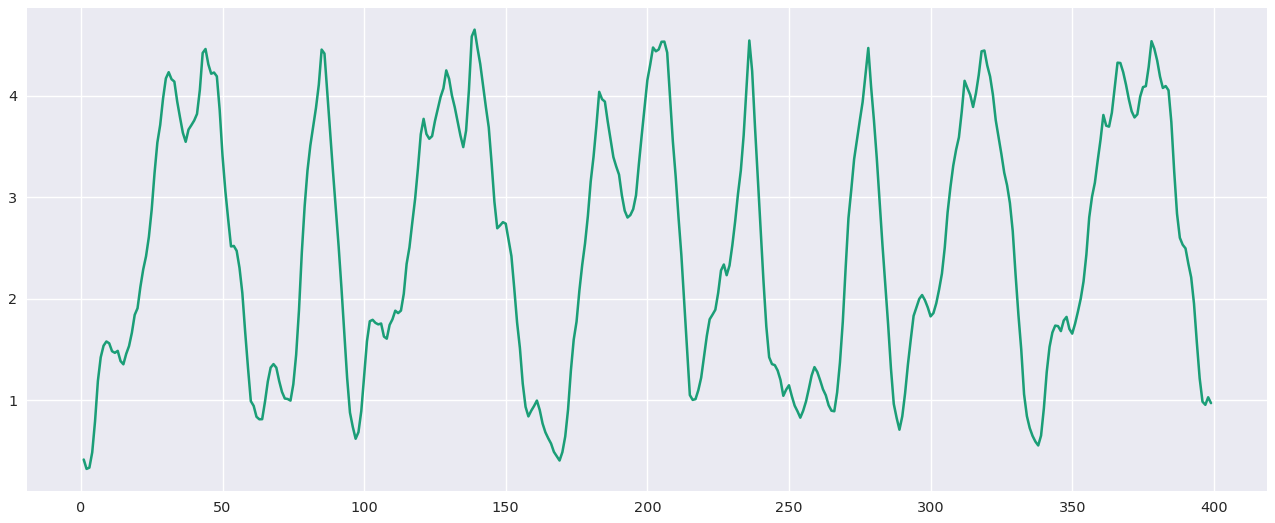

L_T2


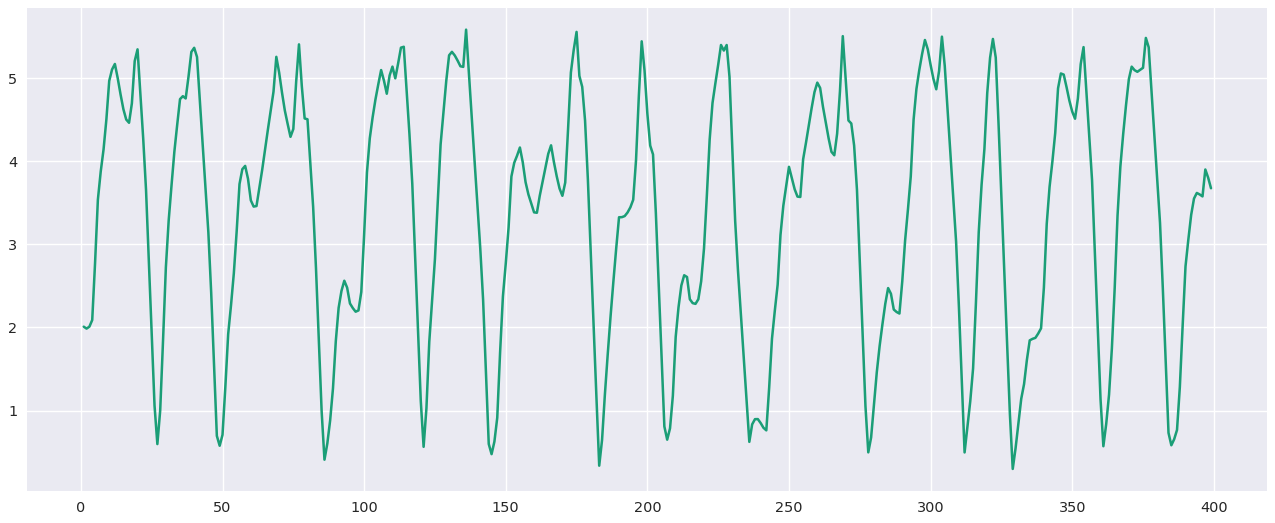

L_T3


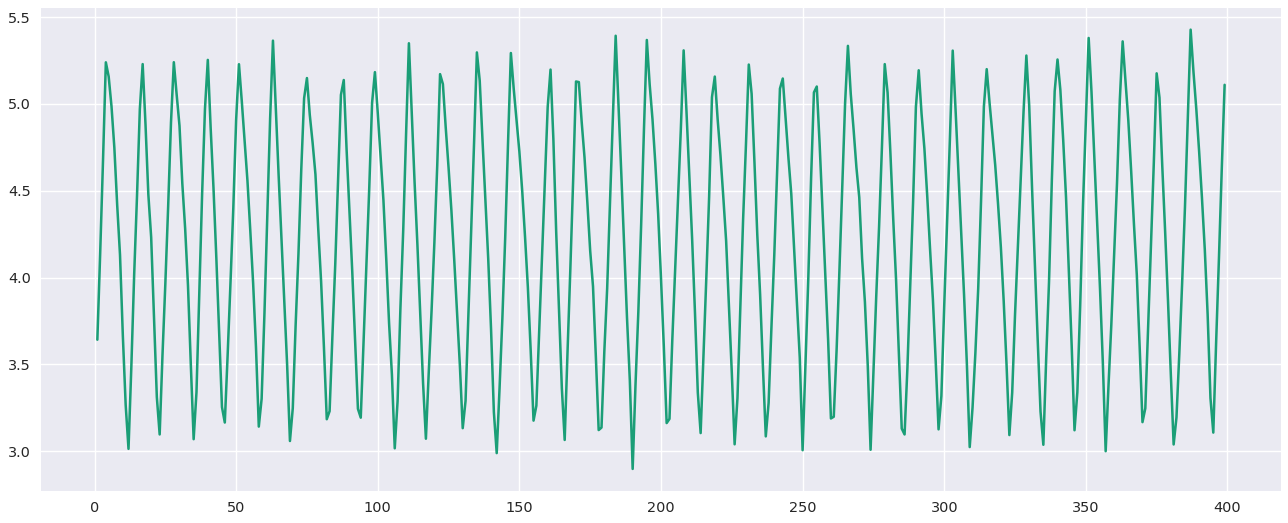

L_T4


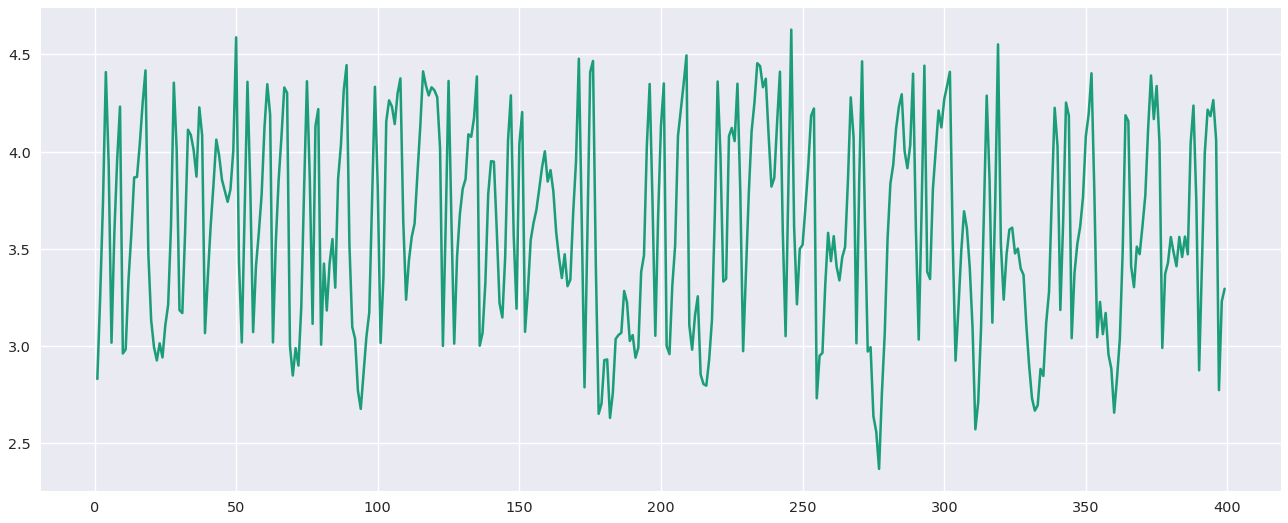

L_T5


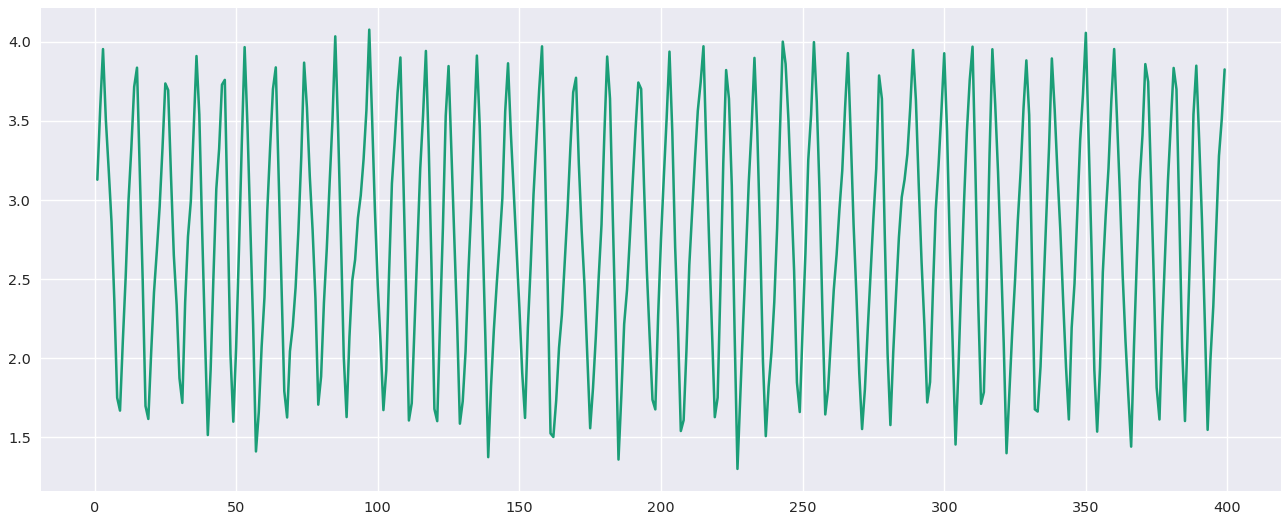

L_T6


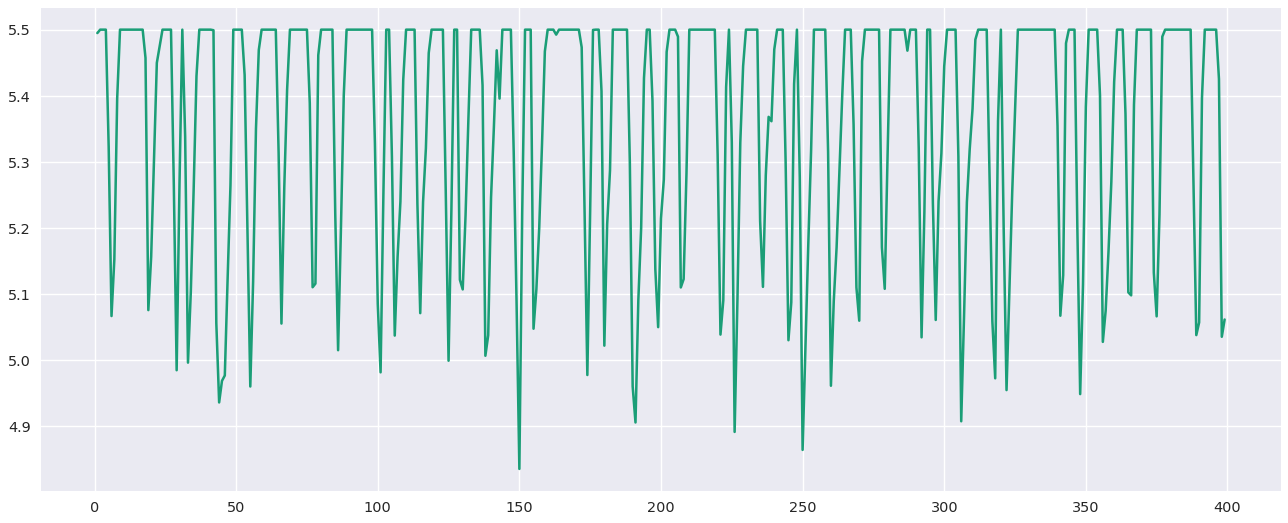

L_T7


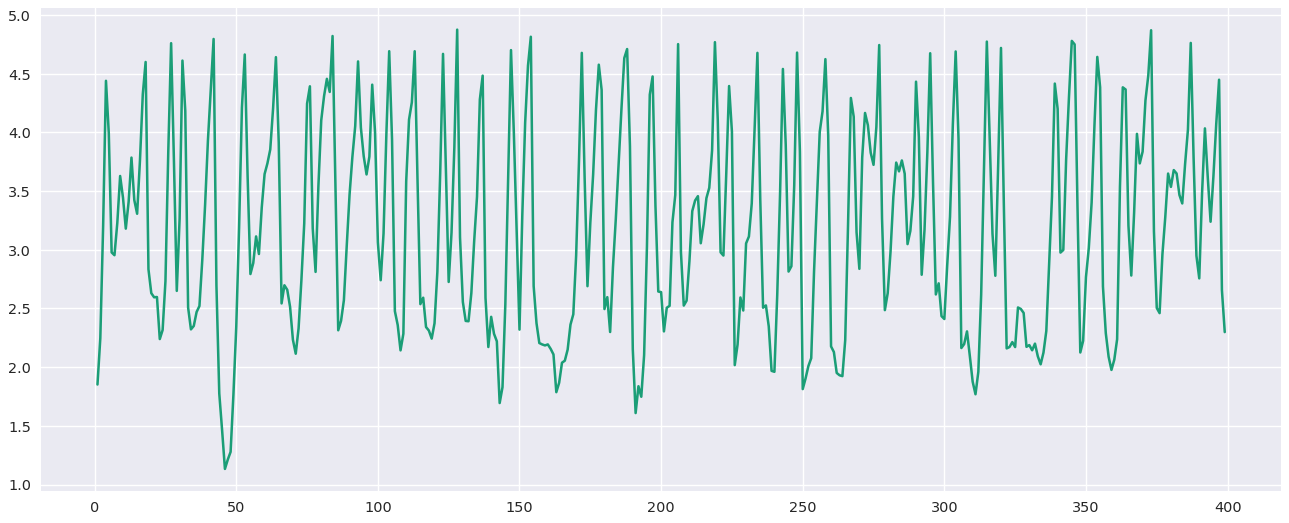

F_PU1


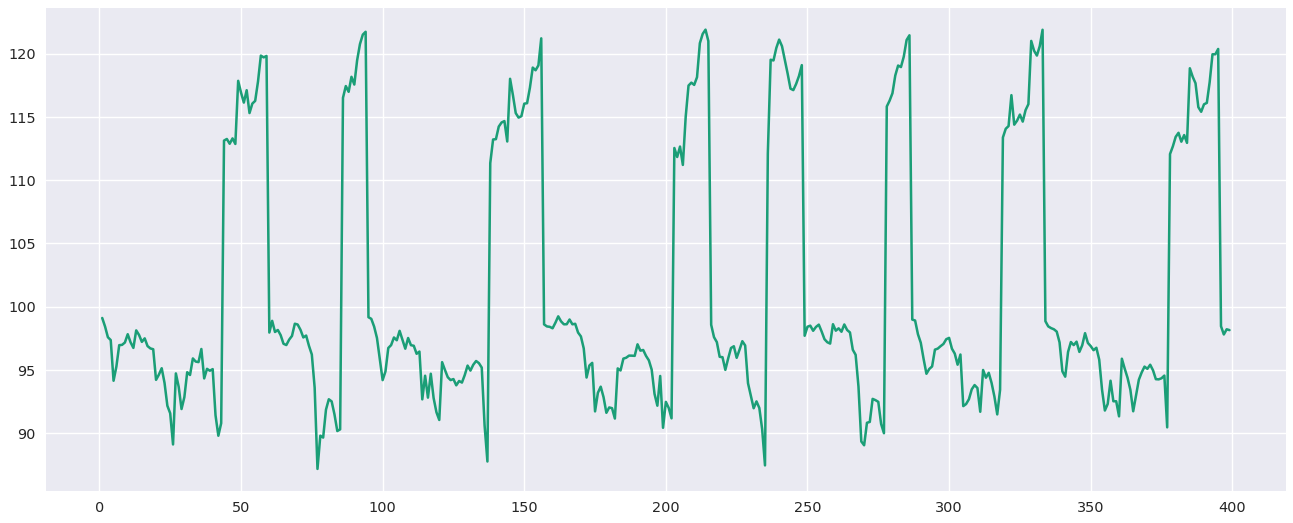

S_PU1


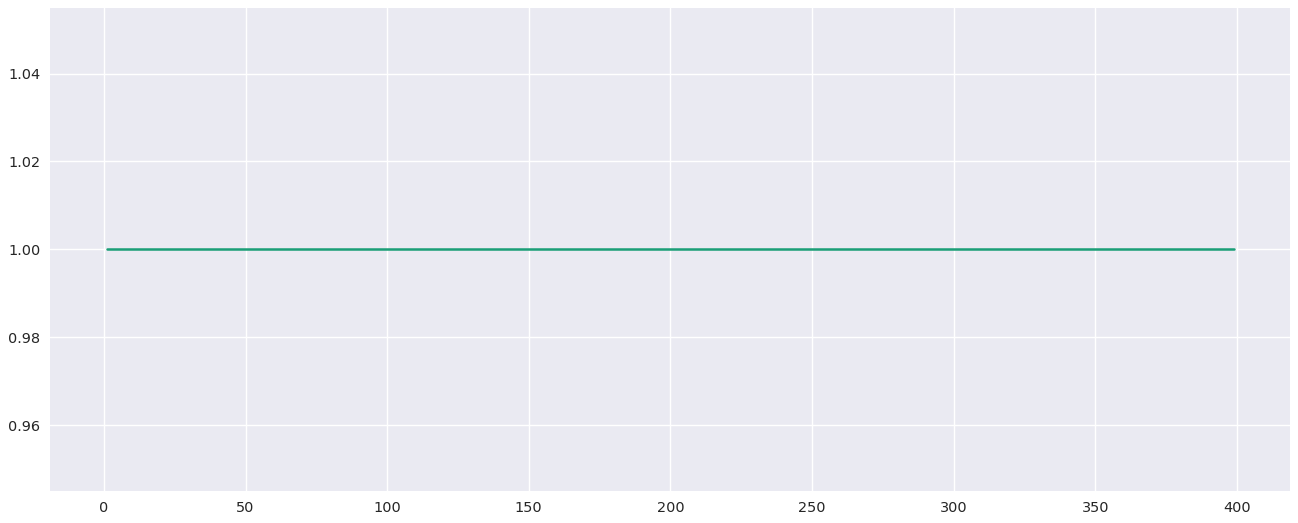

F_PU2


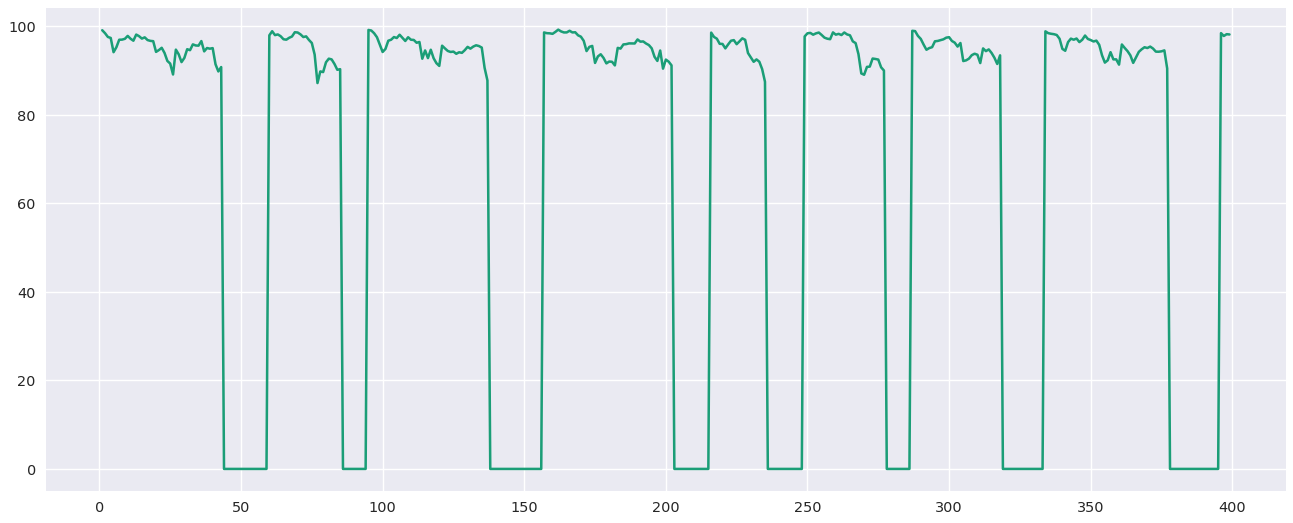

S_PU2


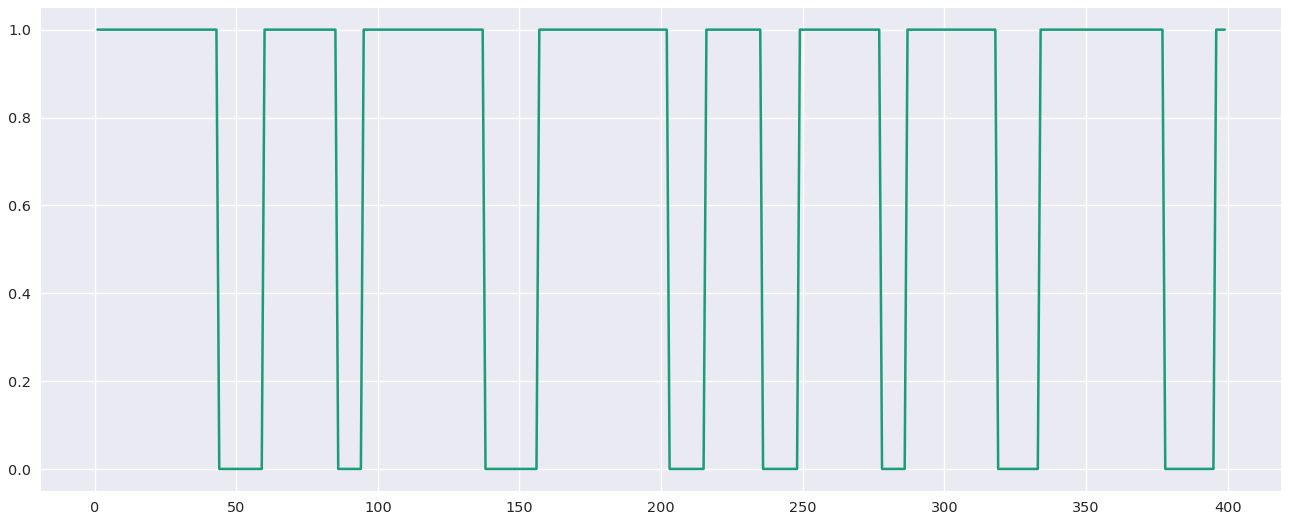

F_PU3


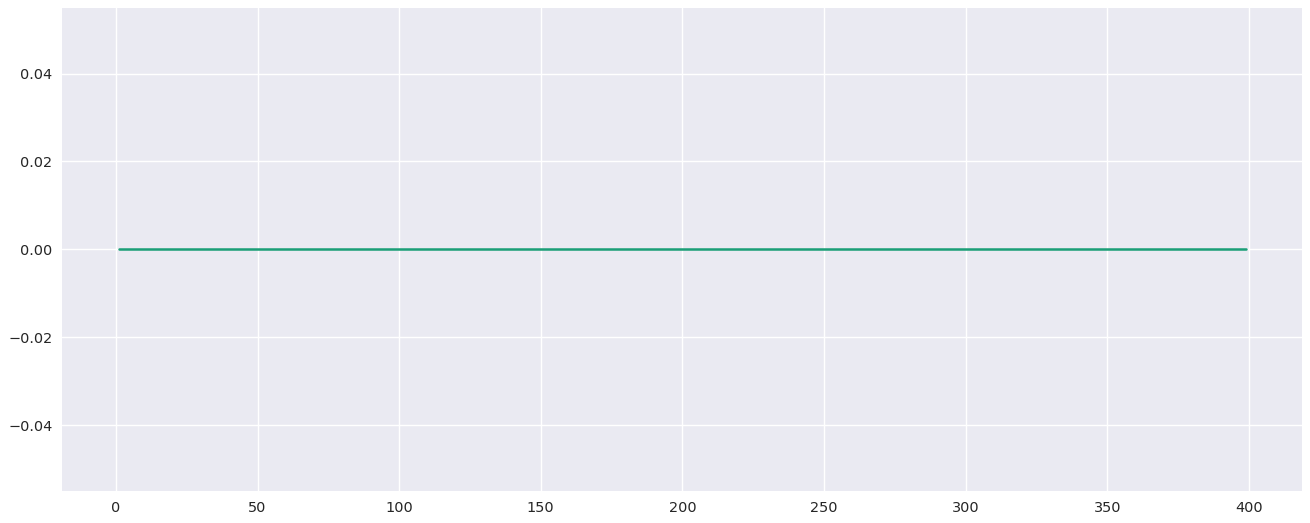

S_PU3


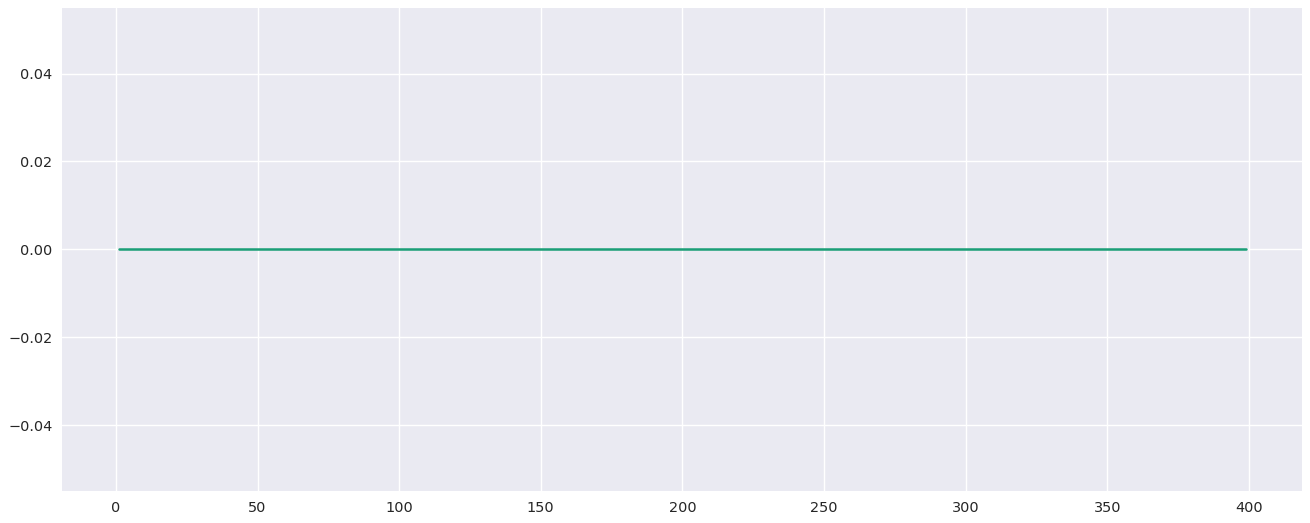

F_PU4


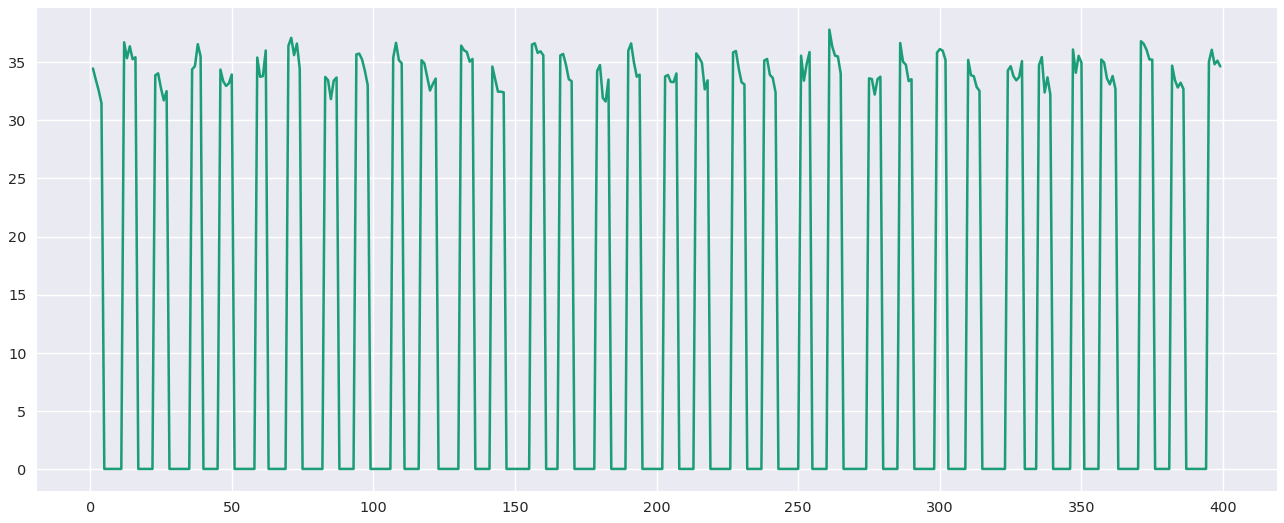

S_PU4


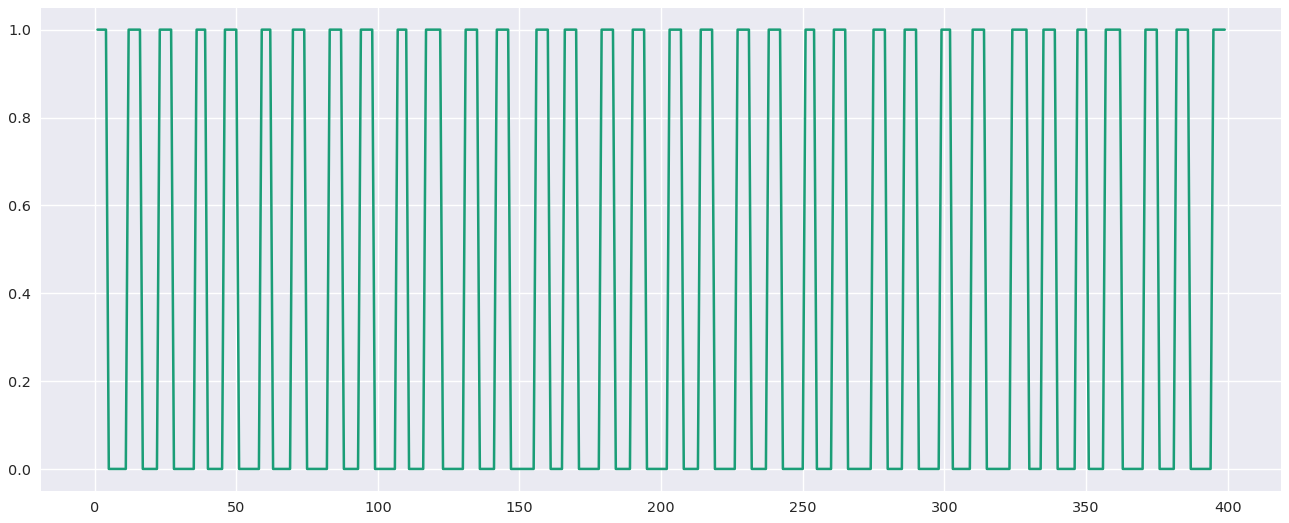

F_PU5


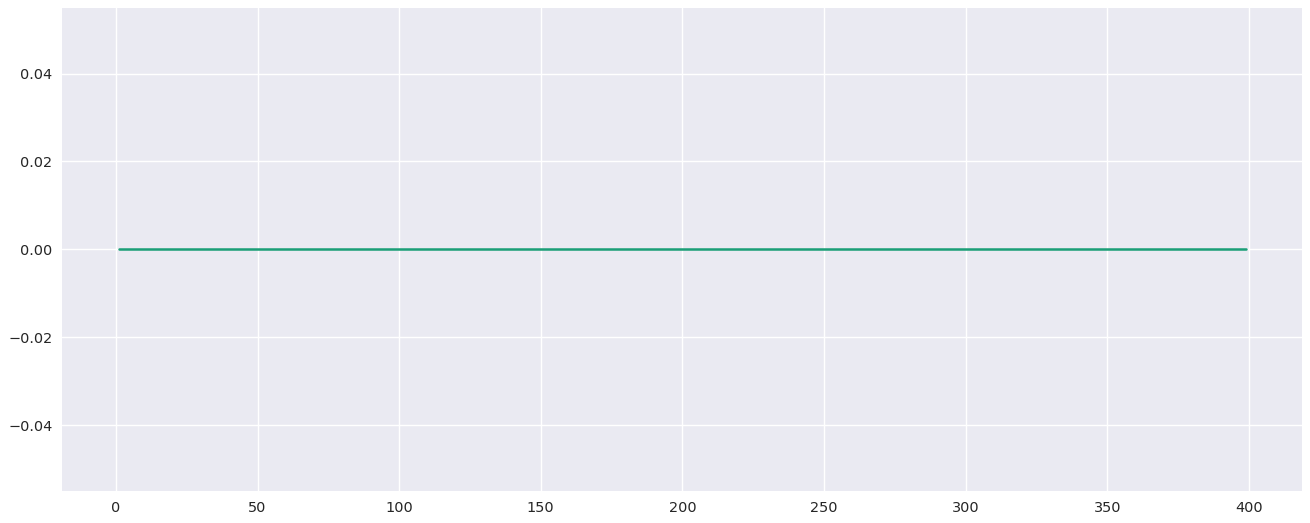

S_PU5


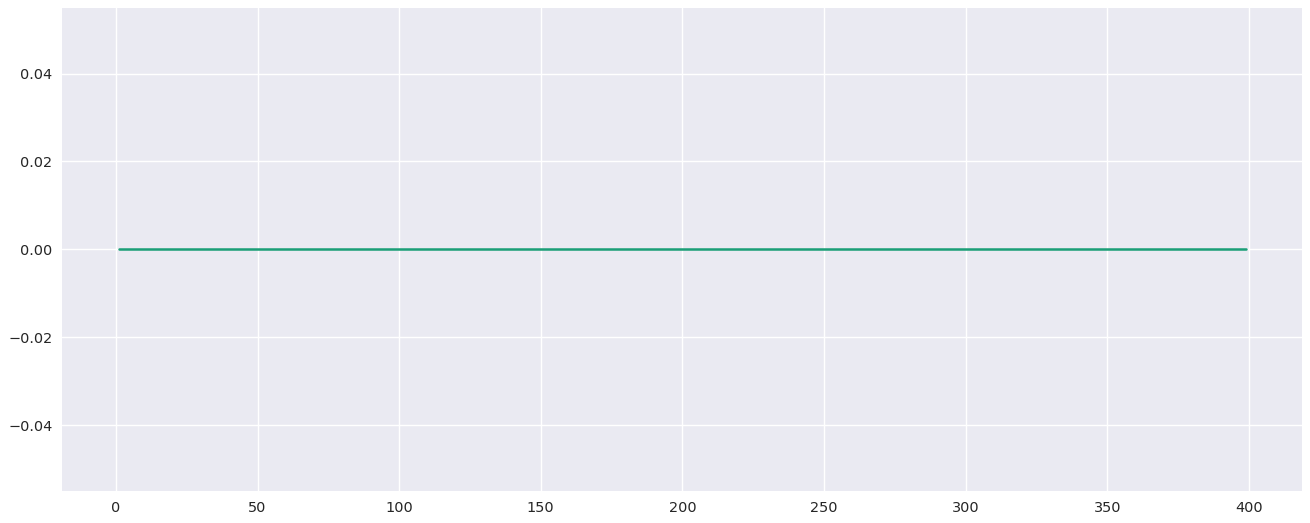

F_PU6


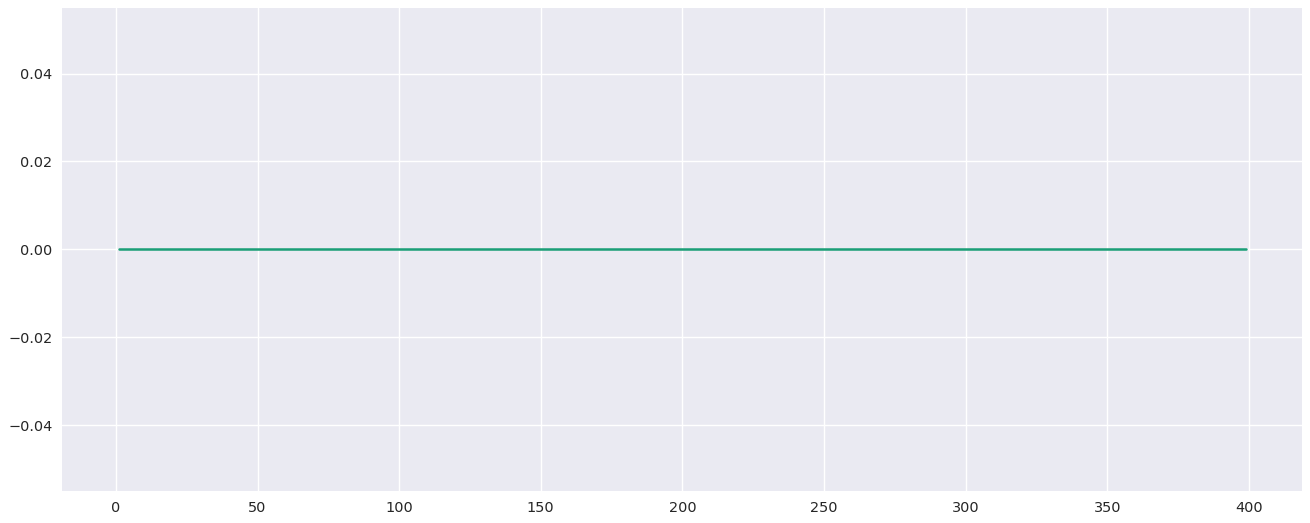

S_PU6


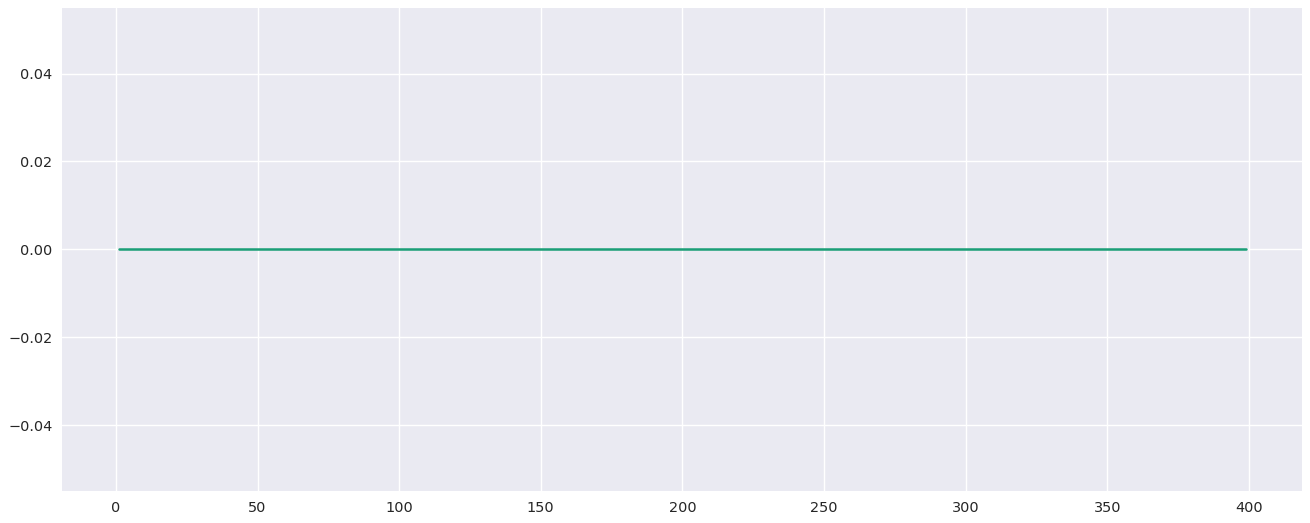

F_PU7


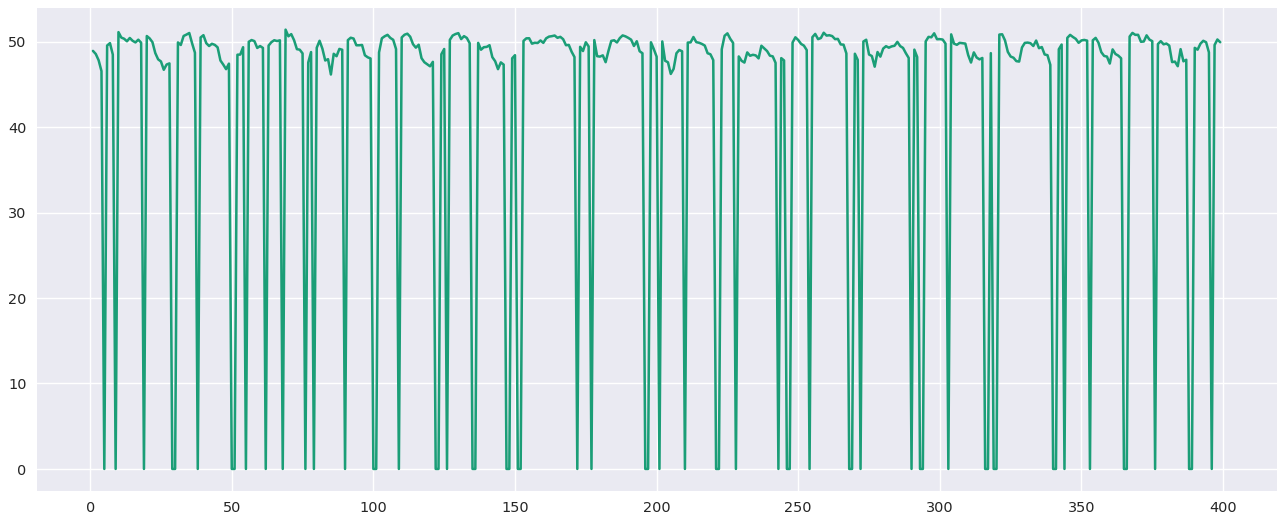

S_PU7


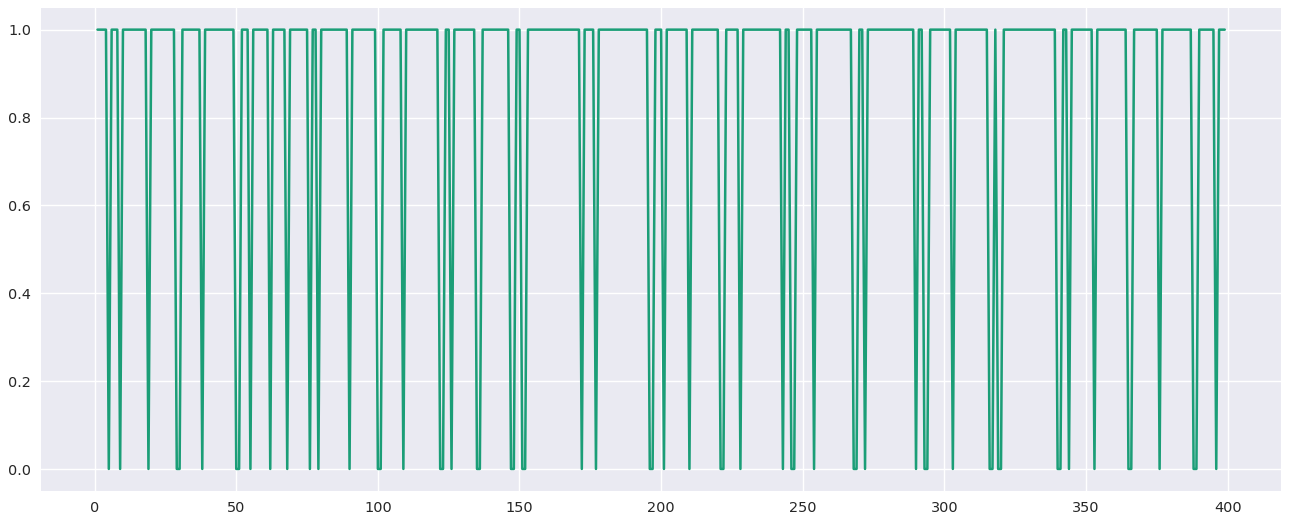

F_PU8


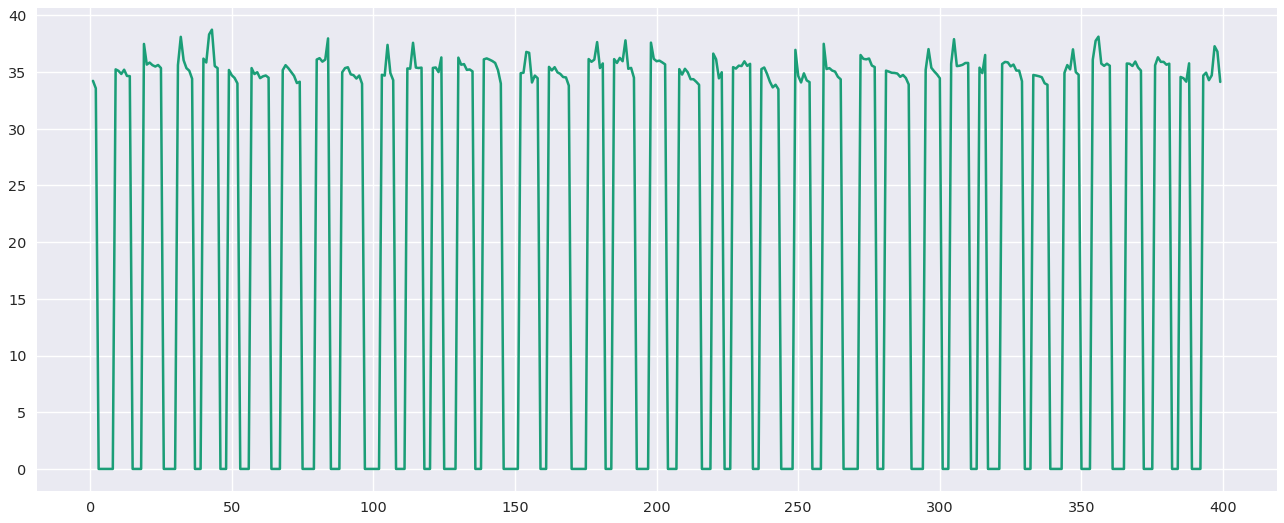

S_PU8


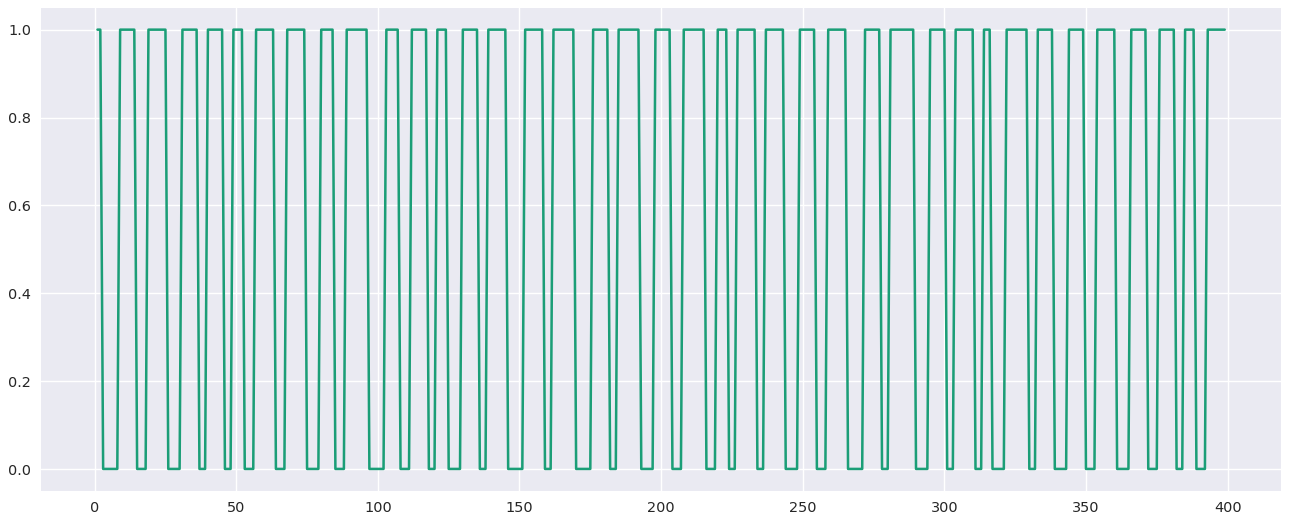

F_PU9


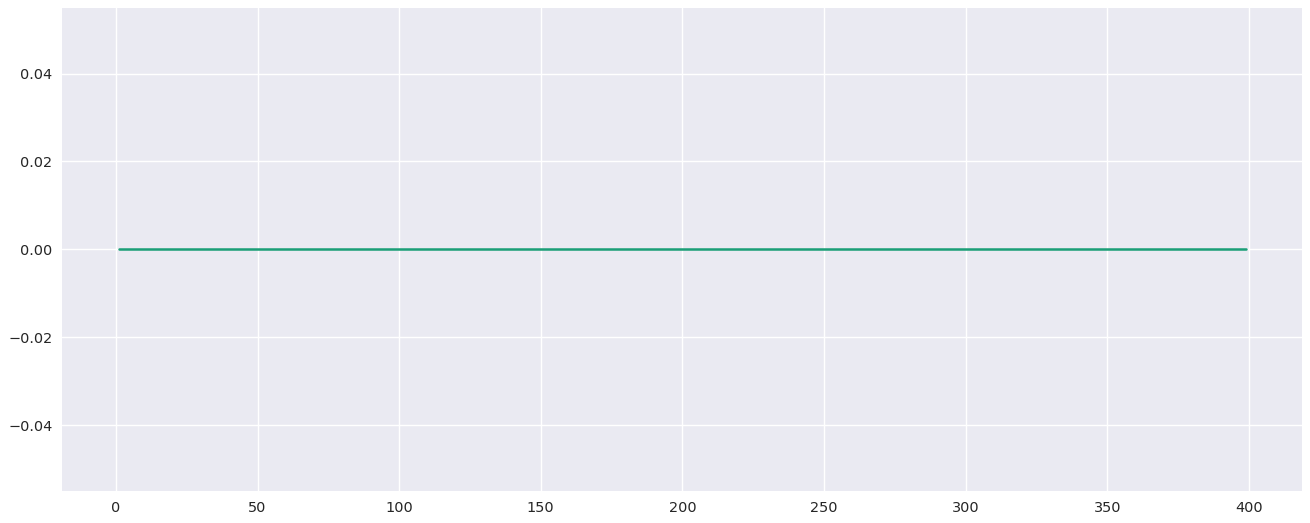

S_PU9


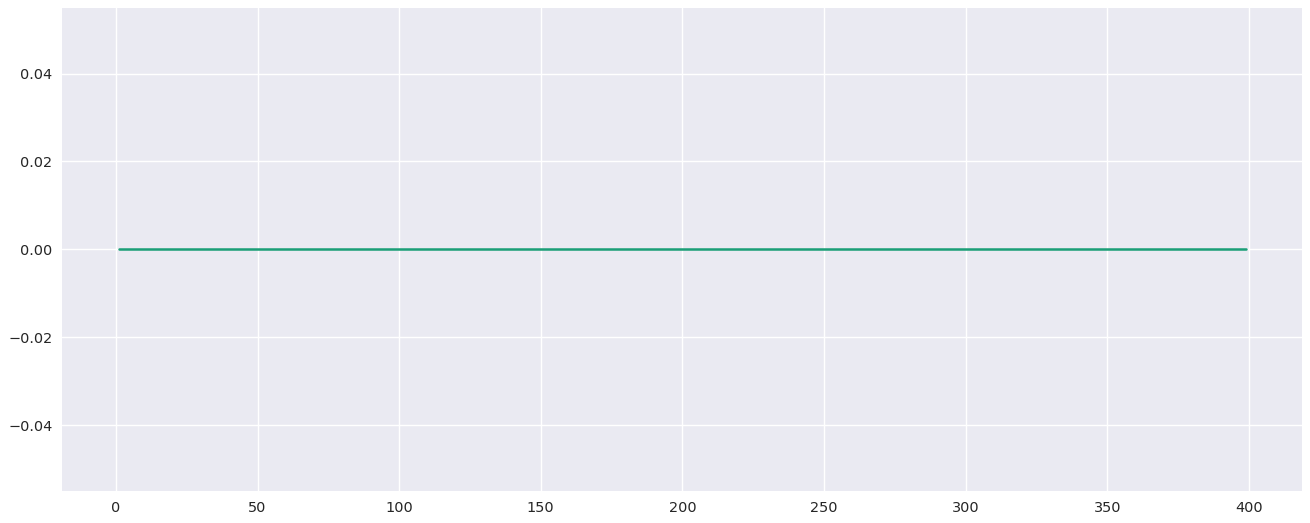

F_PU10


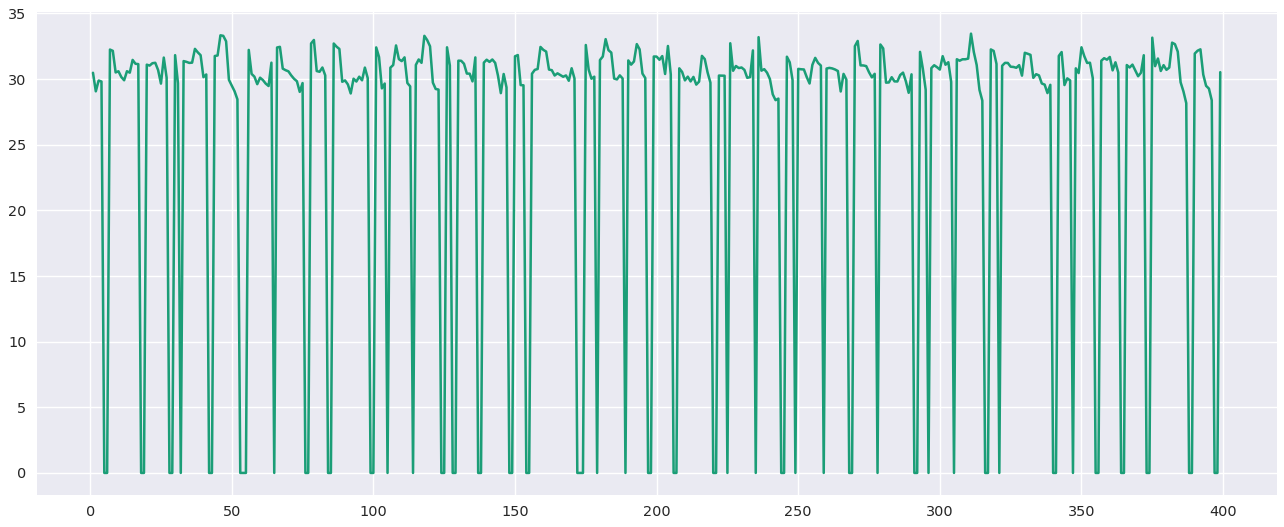

S_PU10


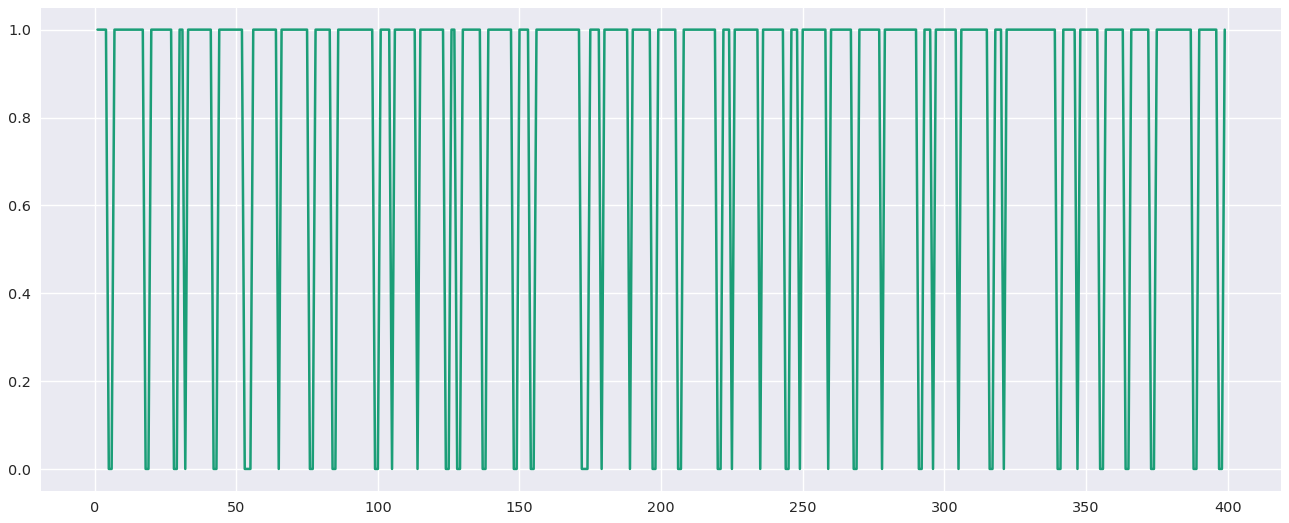

F_PU11


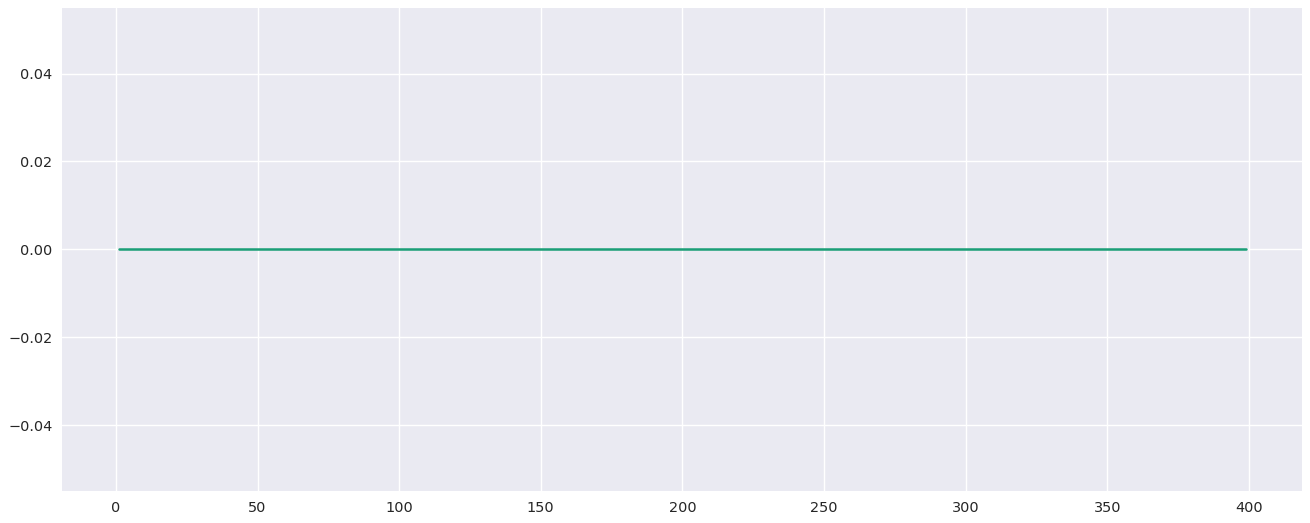

S_PU11


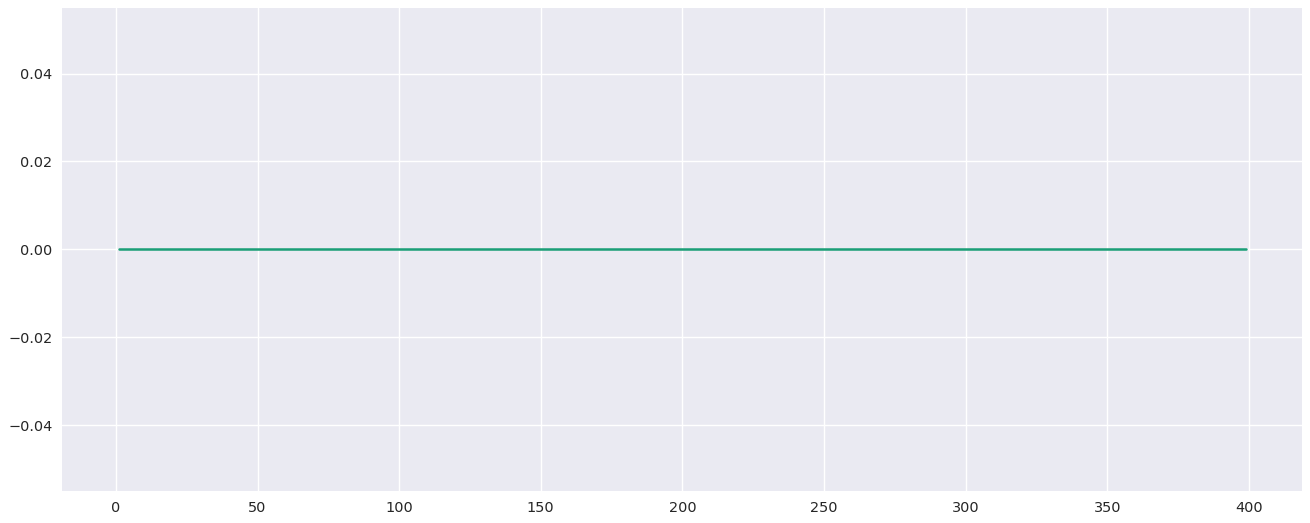

F_V2


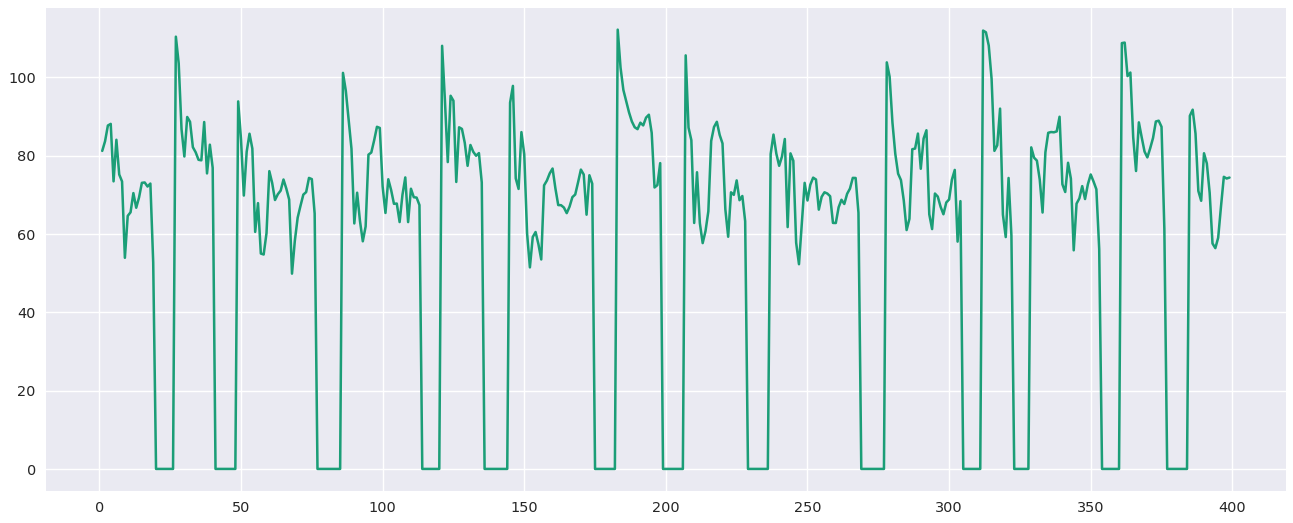

S_V2


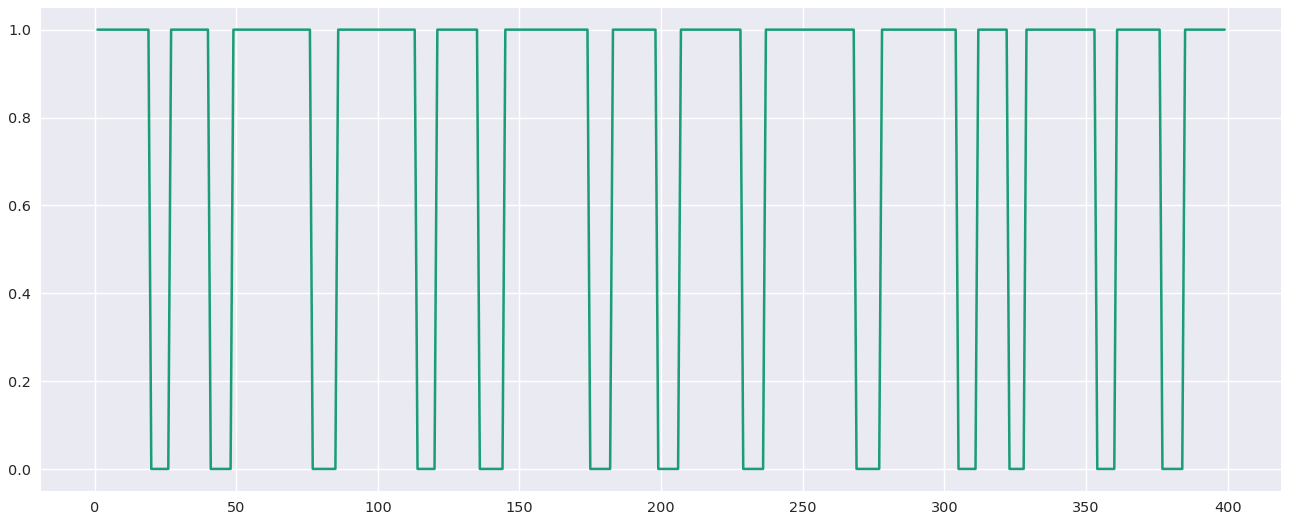

P_J280


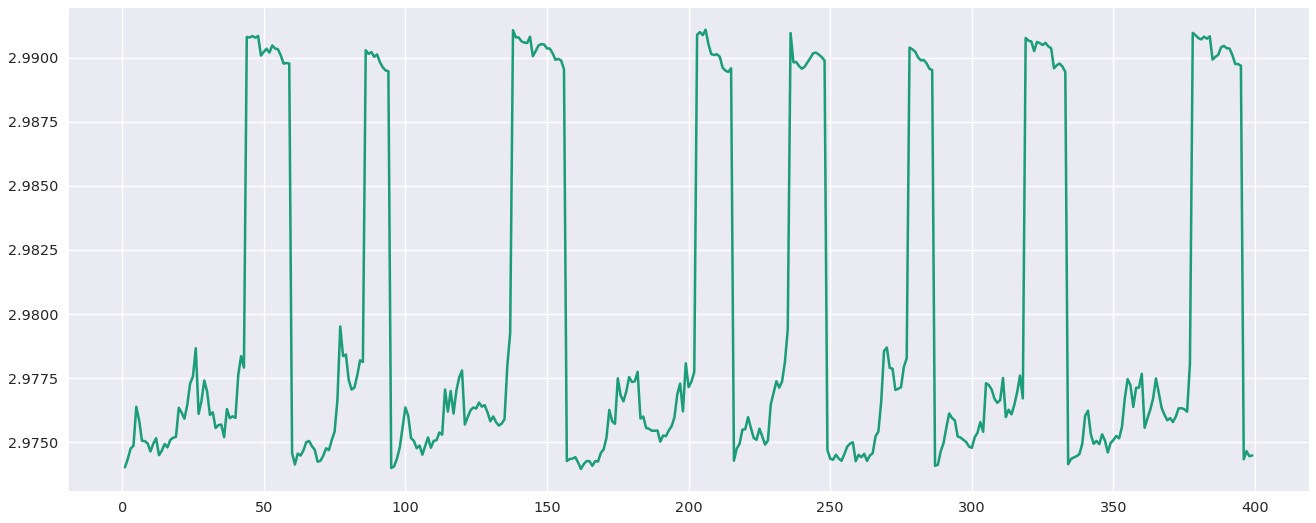

P_J269


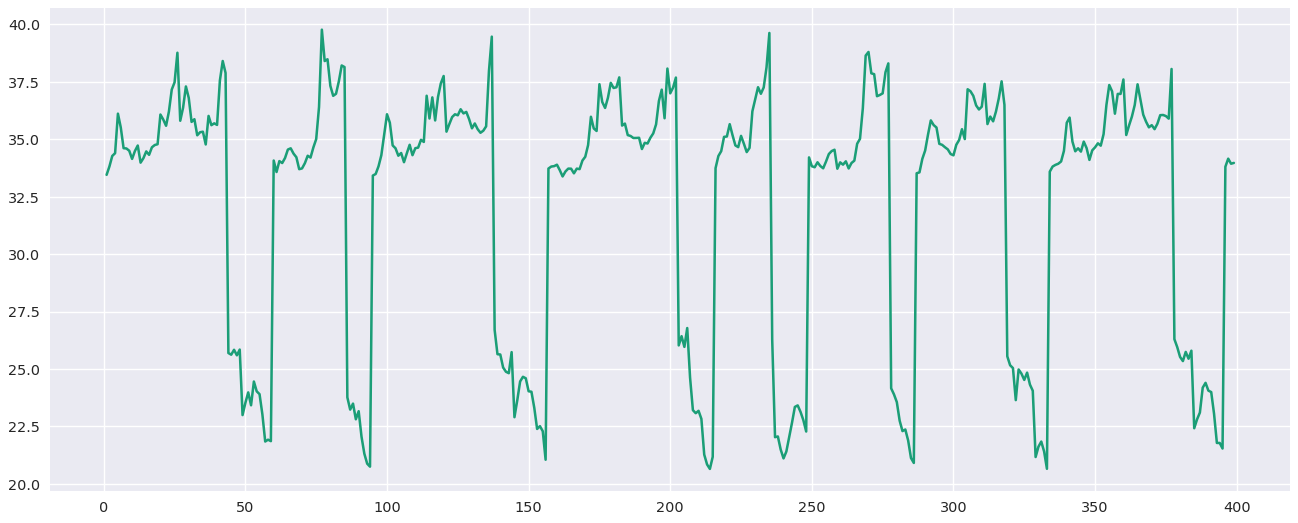

P_J300


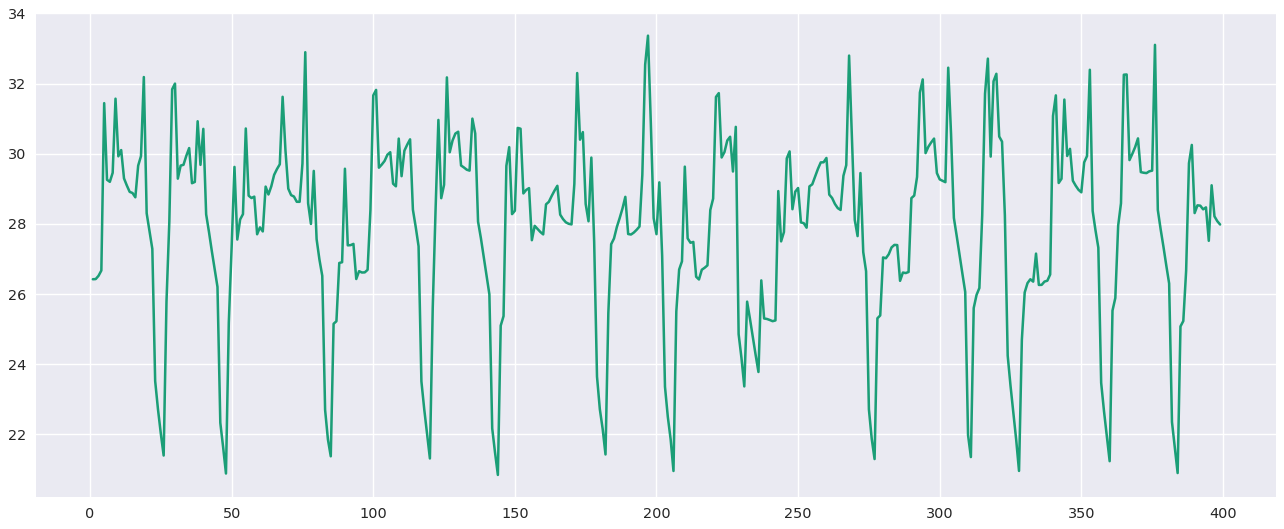

P_J256


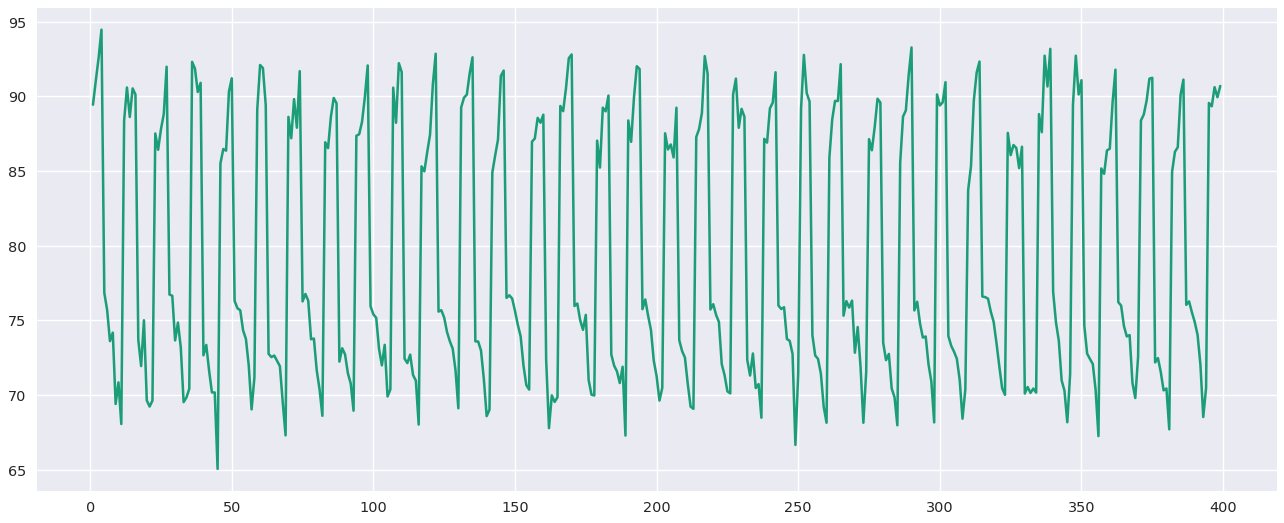

P_J289


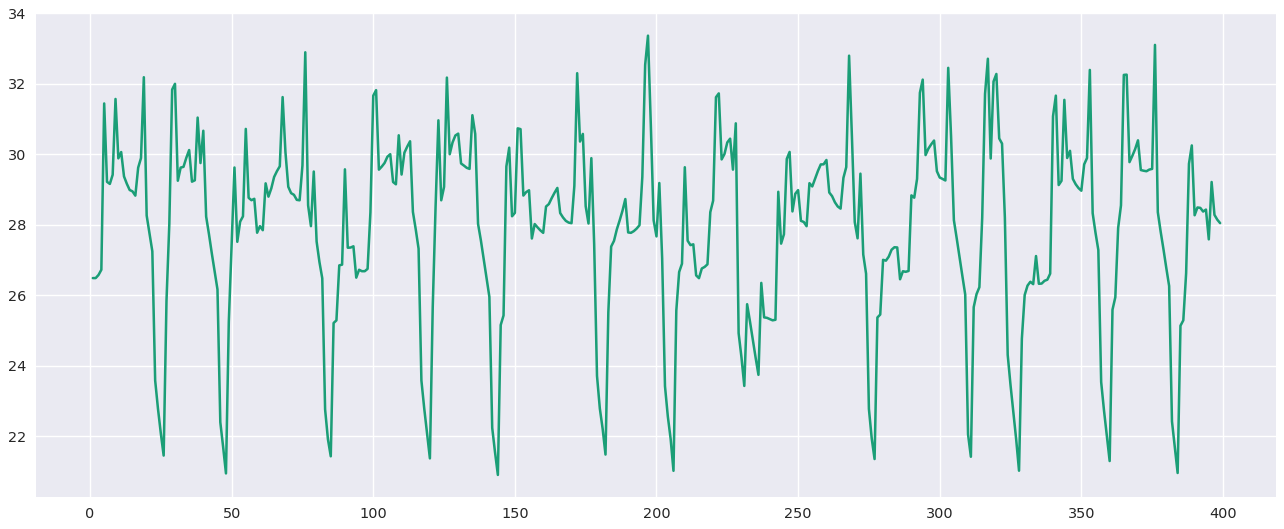

P_J415


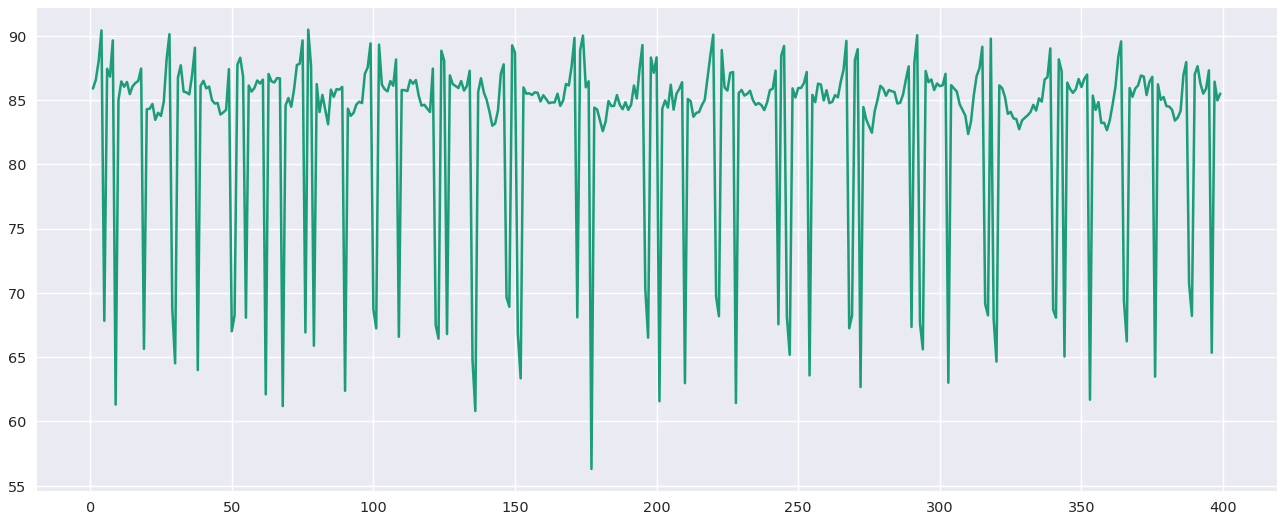

P_J302


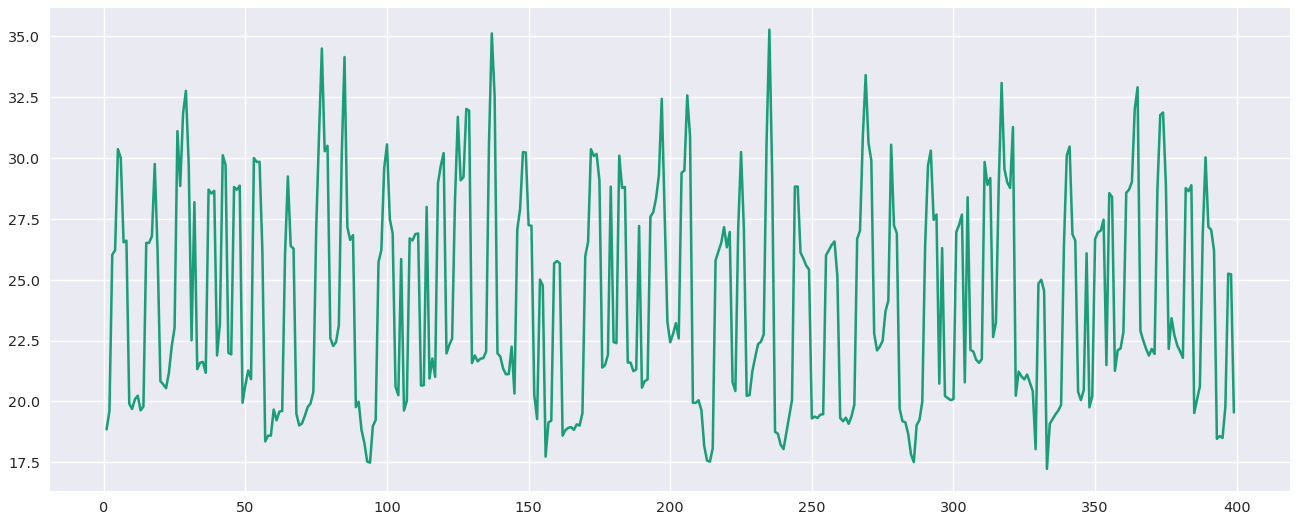

P_J306


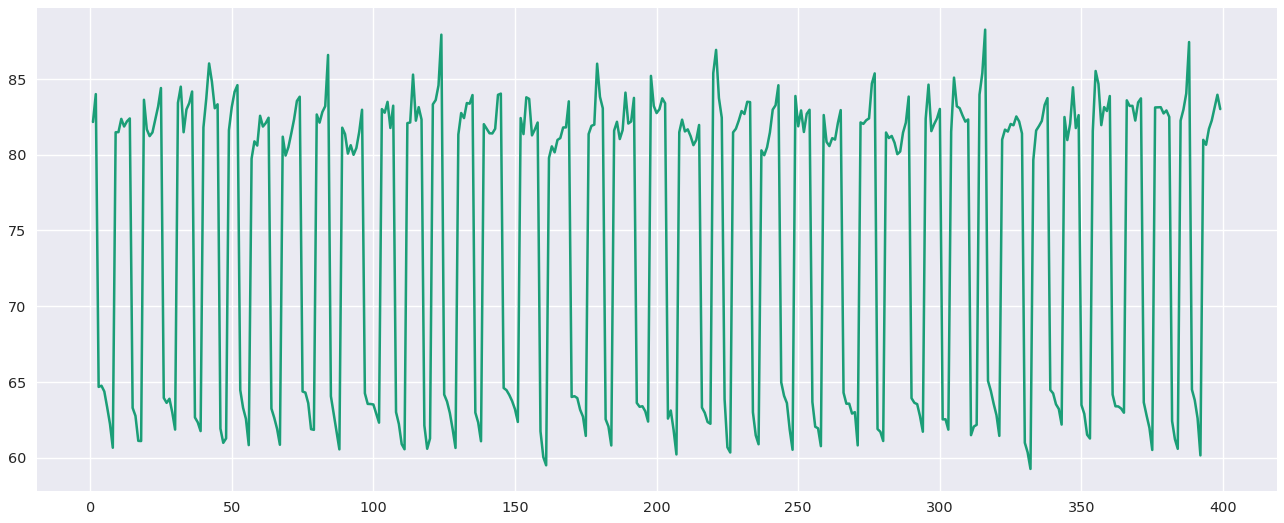

P_J307


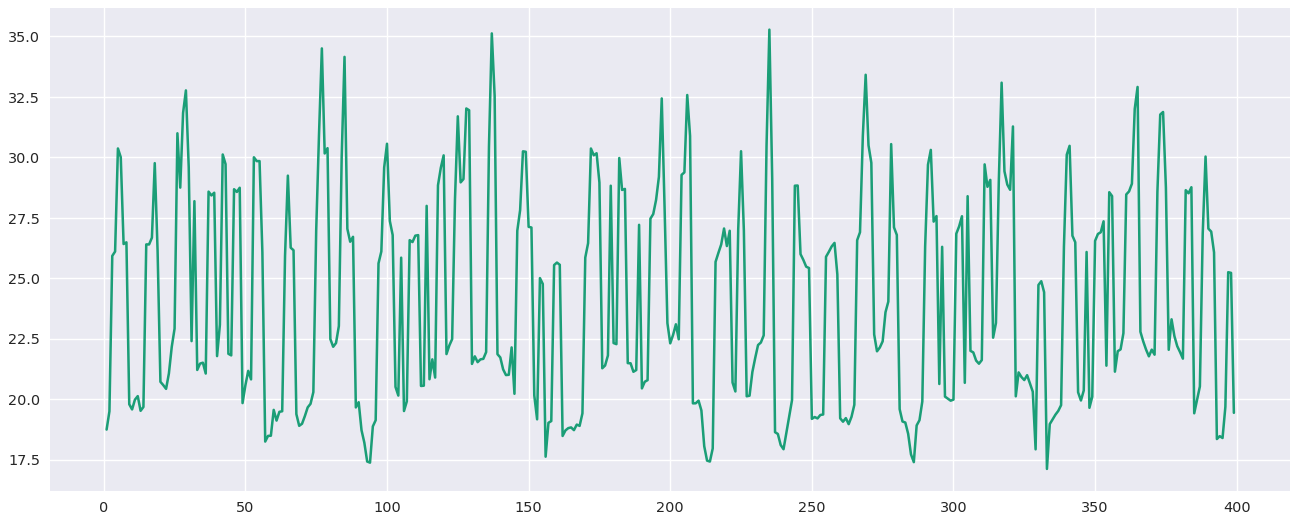

P_J317


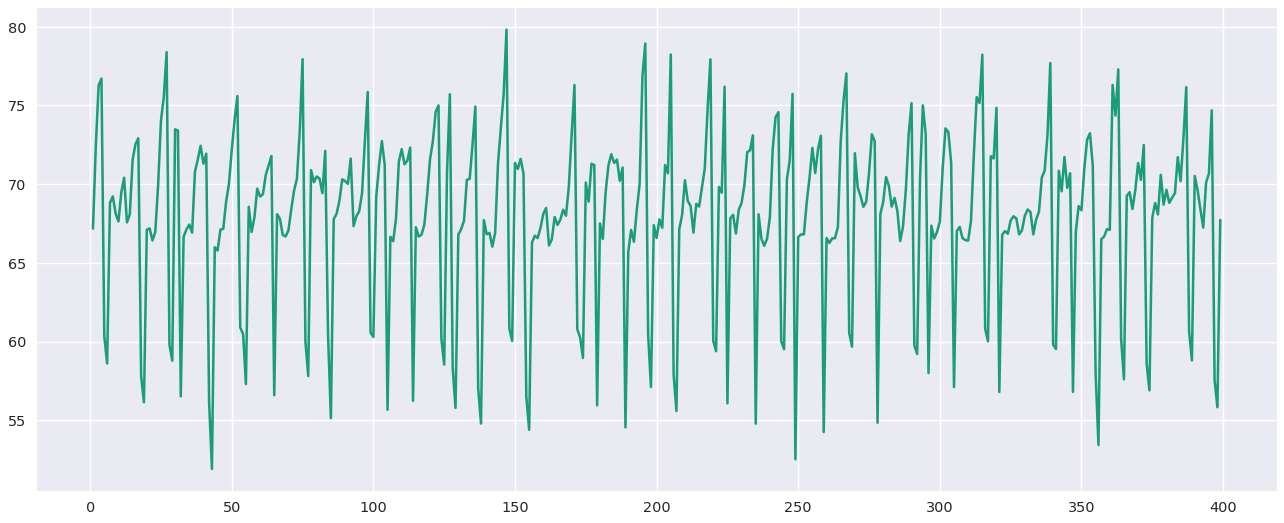

P_J14


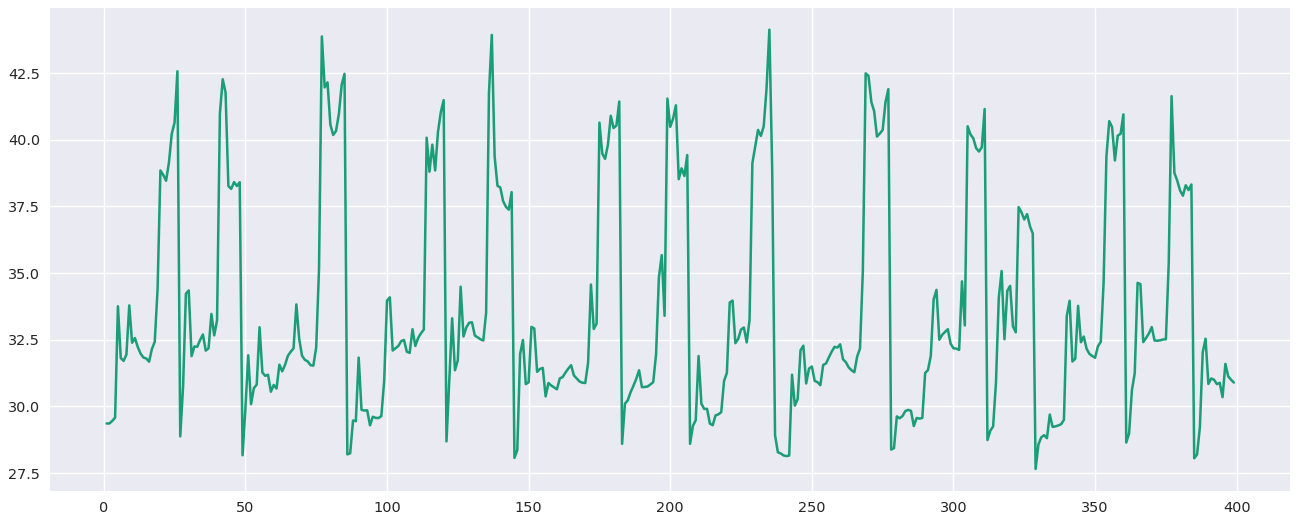

P_J422


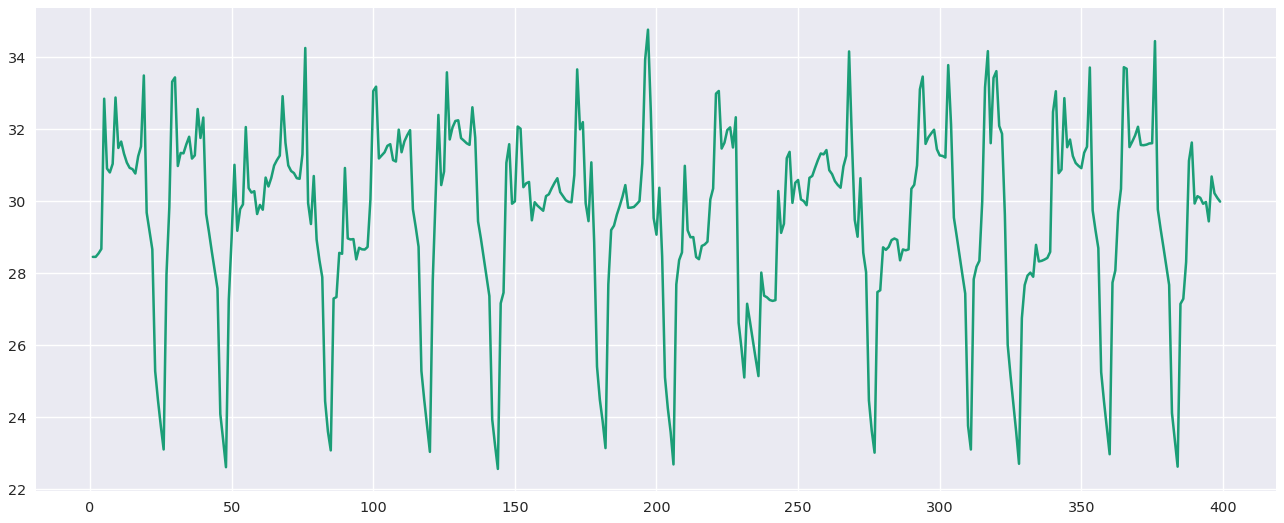

In [52]:
# look at every signal
idx1 = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
        'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
        'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
        'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
        'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
        'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']
for item in idx1:
    print(item)
    data = dataset1[item][1:400] # one more blank
    plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(data)
    plt.show()

/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/hom

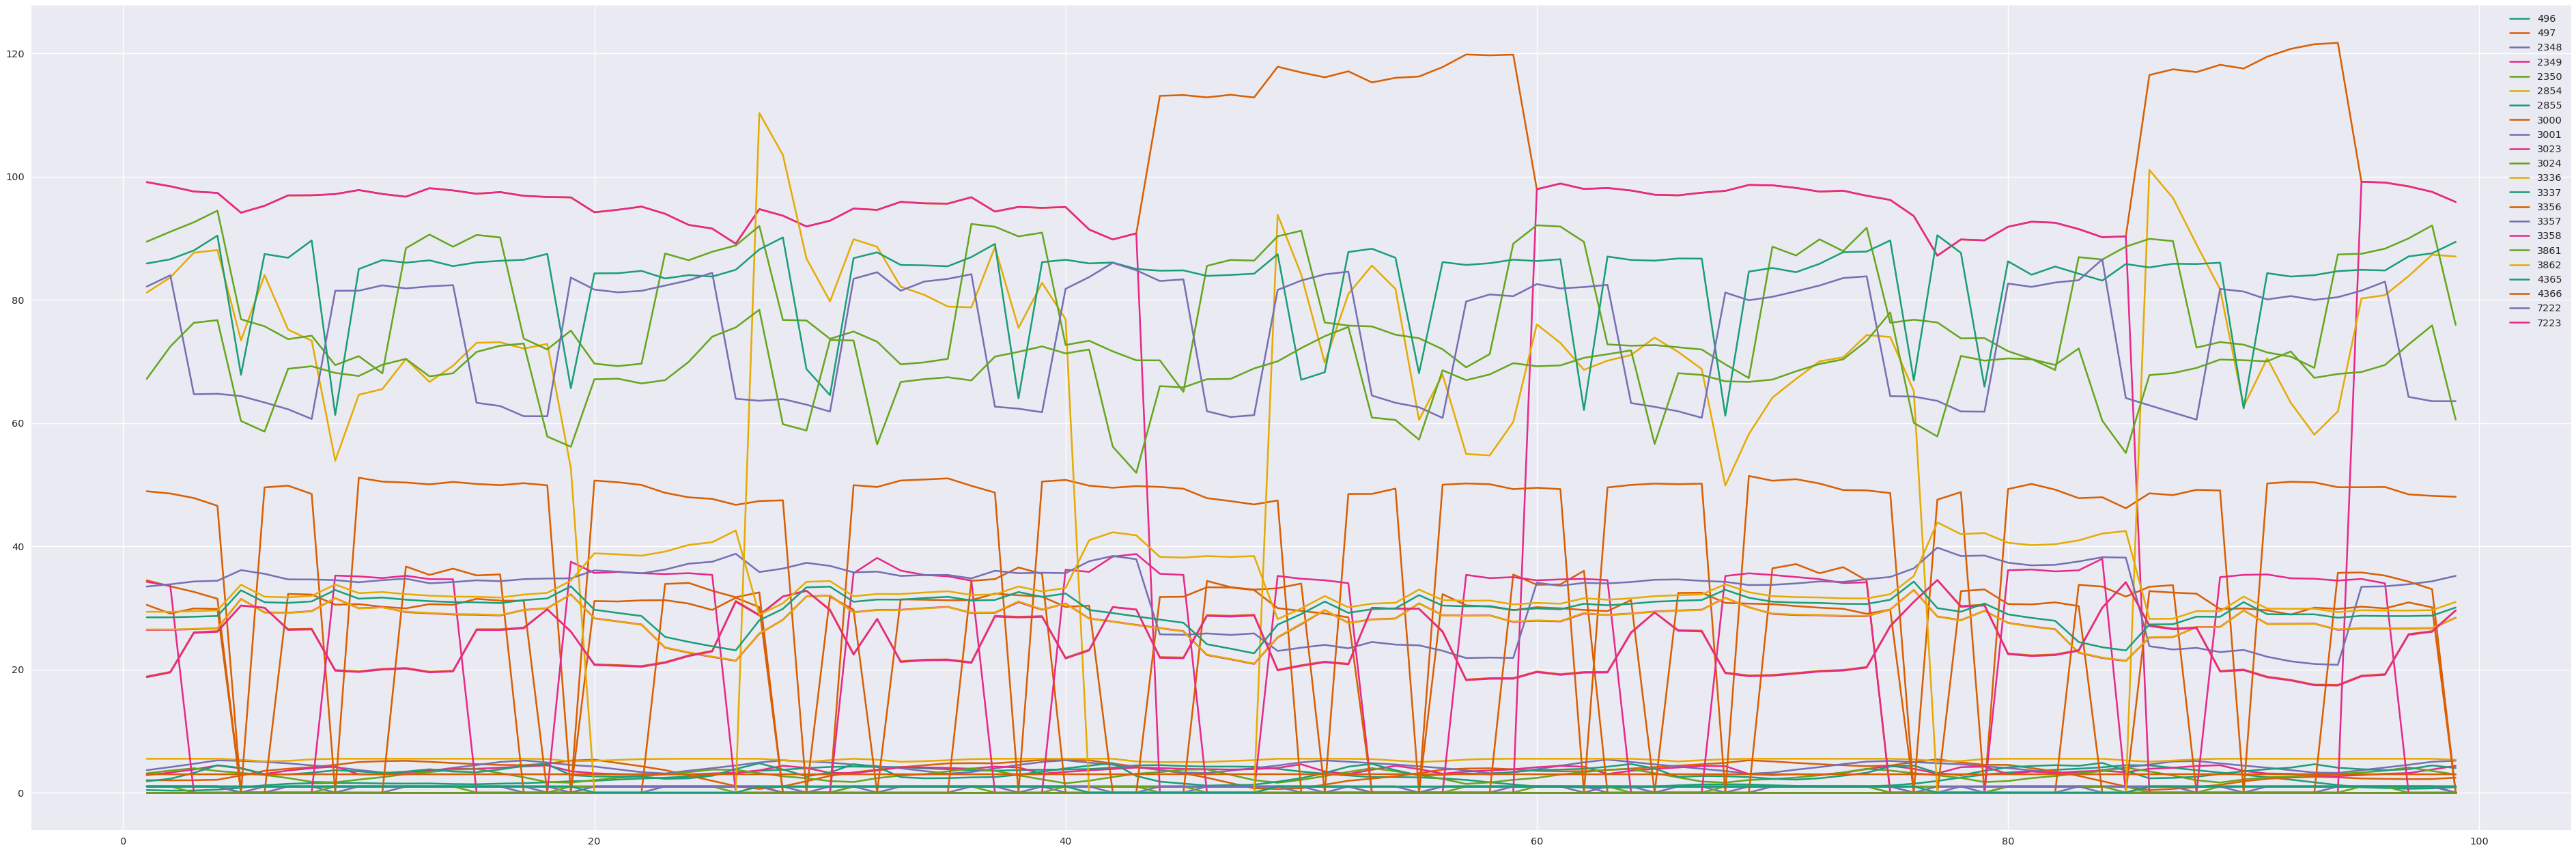

In [53]:
# plot all the signals in one figure 
plt.figure(num=None, figsize=(60, 20), dpi=80, facecolor='w', edgecolor='k')
for item in idx1:
    #print(item)
    data = dataset1[item][1:100] # one more blank
    #plt.figure(num=None, figsize=(60, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(data)
    plt.hold(True)
plt.legend(idx)
plt.show()

In [54]:
# remove constant signals
idx_pattern1 = idx1
remove1 = ['S_PU1', 'F_PU3', 'S_PU3', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU9', 
           'S_PU9', 'F_PU11', 'S_PU11']
for item in remove1:
    idx_pattern1.remove(item)
print(idx_pattern1)

['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'F_PU2', 'S_PU2', 'F_PU4', 'S_PU4', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU10', 'S_PU10', 'F_V2', 'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']


/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  import sys
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/xin/anaconda2/envs/python3/lib/python3

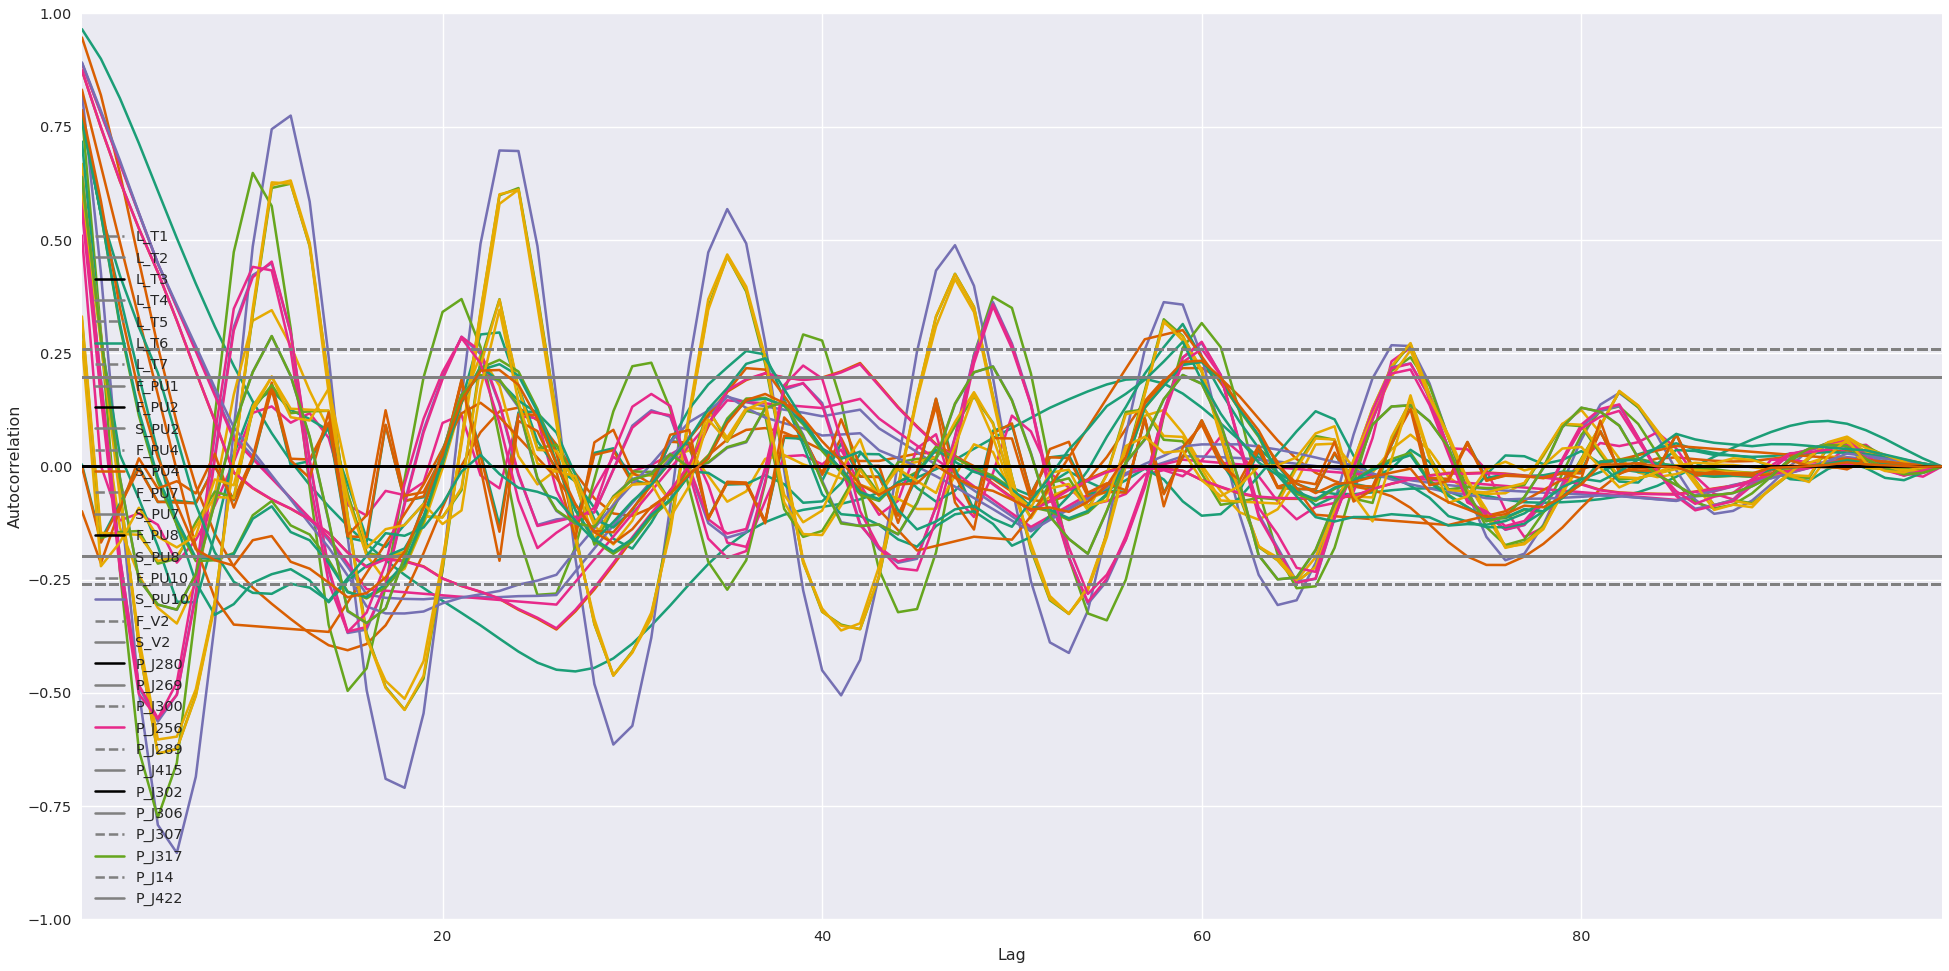

In [55]:
# see the autocorrelation of unconstant signals
plt.figure(num=None, figsize=(30, 15), dpi=80, facecolor='w', edgecolor='k')
for item in idx_pattern1:
    #print(item)
    data = dataset1[item][1:100] # one more blank
    #plt.figure(num=None, figsize=(60, 8), dpi=80, facecolor='w', edgecolor='k')
    autocorrelation_plot(data)

    plt.hold(True)
plt.legend(idx_pattern1)
pyplot.show()

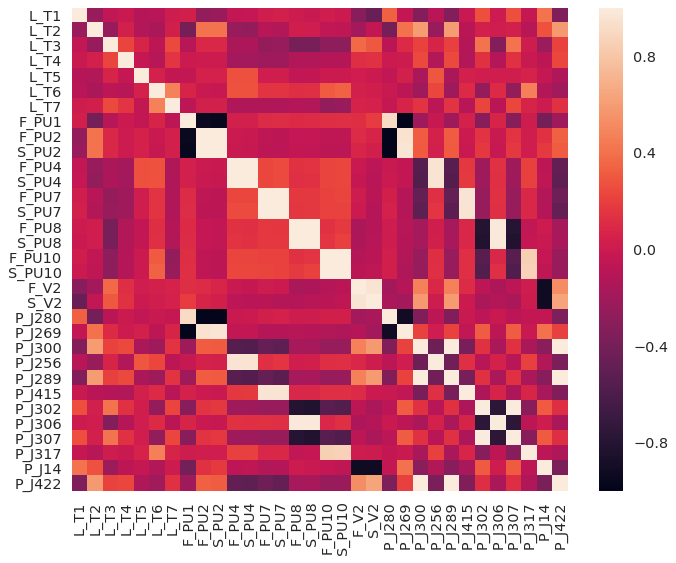

In [56]:
#see the correlation matrix
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.matshow(dataset1.corr())
import seaborn as sns
corr = dataset1[idx_pattern1].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [57]:
# look the anomaly data
data = dataset2 [dataset2[' ATT_FLAG']==1]
data

DATETIME   L_T1   L_T2   L_T3   L_T4   L_T5   L_T6   L_T7   F_PU1  \
1731  14/09/16 03   3.75   1.00   5.24   3.42   3.67   5.36   4.78   94.80   
1732  14/09/16 04   3.80   1.56   5.02   4.09   3.79   5.40   3.75   94.44   
1733  14/09/16 05   4.00   2.28   4.78   4.41   3.42   5.22   2.95   91.79   
1734  14/09/16 06   4.21   3.15   4.53   3.35   2.83   5.36   2.87   93.26   
1735  14/09/16 07   4.29   3.69   4.26   3.24   2.17   5.48   3.47   94.31   
1736  14/09/16 08   4.36   4.10   3.86   3.49   1.59   5.36   4.36   94.92   
1737  14/09/16 09   4.21   4.45   3.46   3.39   1.80   5.50   4.59   94.55   
1738  14/09/16 10   4.09   4.79   3.03   3.69   2.19   5.50   4.50   94.66   
1739  14/09/16 11   3.98   4.80   3.46   3.72   2.59   5.50   4.29   96.24   
1740  14/09/16 12   3.81   4.75   3.93   3.66   3.09   5.50   2.76   95.69   
1741  14/09/16 13   3.70   4.73   4.47   3.74   3.57   5.34   2.75   96.36   
1742  14/09/16 14   3.55   4.68   4.90   4.22   3.86   5.43   3.16   96.01   
1743  14/09/16 15   3.54   4.73   5.23   4.32   3.58   5.25   3.51   95.43   
1744  14/09/16 16   3.60   5.05   4.85   4.44   2.84   5.28   3.68   95.09   
1745  14/09/16 17   3.70   5.61   4.51   3.42   2.03   5.45   4.12   90.74   
1746  14/09/16 18   4.09   5.22   4.17   3.08   1.58   5.43   4.79   91.72   
1747  14/09/16 19   4.32   4.69   3.80   3.35   2.11   5.50   3.47   91.24   
1748  14/09/16 20   4.50   4.16   3.31   2.99   2.56   5.50   2.35  113.08   
1749  14/09/16 21   4.41   3.54   3.10   2.84   2.95   5.38   2.07  114.68   
1750  14/09/16 22   4.18   2.65   3.46   2.75   3.23   5.47   1.82  114.22   
1751  14/09/16 23   4.06   1.78   3.88   2.62   3.51   5.24   1.70  113.97   
1752  15/09/16 00   3.91   0.92   4.29   2.70   3.82   5.37   1.65  112.32   
1753  15/09/16 01   3.70   0.58   4.73   2.62   3.58   5.50   2.32  115.90   
1754  15/09/16 02   3.41   0.77   5.26   3.00   2.99   5.34   2.83  117.24   
1755  15/09/16 03   3.21   1.18   5.16   3.62   2.45   5.21   3.69  116.44   
1756  15/09/16 04   3.03   1.62   4.94   4.28   1.96   5.29   4.97  114.93   
1757  15/09/16 05   2.93   2.23   4.77   3.85   1.58   5.38   3.91  115.04   
1758  15/09/16 06   2.75   2.91   4.53   2.95   2.07   5.27   2.49  118.66   
1759  15/09/16 07   2.46   3.16   4.25   3.21   2.75   5.14   3.07  118.76   
1760  15/09/16 08   2.16   3.37   3.86   3.66   3.34   5.21   3.31  119.97   
...           ...    ...    ...    ...    ...    ...    ...    ...     ...   
3784  08/12/16 16   3.88   0.79   5.41   3.33   2.13   5.50   3.72  116.17   
3785  08/12/16 17   3.54   1.21   5.07   3.26   1.56   5.50   4.09  117.88   
3786  08/12/16 18   3.12   1.56   4.70   3.29   1.95   5.50   4.41  119.09   
3787  08/12/16 19   2.68   1.83   4.33   3.07   2.35   5.50   4.67  119.14   
3788  08/12/16 20   2.27   2.08   3.99   3.01   2.71   5.50   4.60  120.41   
3789  08/12/16 21   1.83   2.25   3.58   2.69   2.91   5.50   4.75  120.56   
3790  08/12/16 22   1.42   2.40   3.15   2.91   3.23   5.50   4.30  121.21   
3791  08/12/16 23   1.00   2.27   3.28   2.82   3.54   5.50   4.38  121.93   
3792  09/12/16 00   0.78   2.17   3.72   3.02   3.76   5.50   4.35   98.55   
3793  09/12/16 01   0.73   2.16   4.20   3.20   3.84   5.50   4.95   96.65   
3794  09/12/16 02   1.00   2.38   4.71   3.45   3.20   5.12   3.13   96.53   
3795  09/12/16 03   1.18   2.85   5.27   3.96   2.68   5.13   2.84   96.31   
3796  09/12/16 04   1.37   3.33   5.16   4.38   2.27   5.50   3.84   96.06   
3797  09/12/16 05   1.59   3.69   5.05   3.83   1.90   5.43   4.49   94.47   
3798  09/12/16 06   1.92   4.26   4.88   3.11   1.61   5.17   3.35   95.76   
3799  09/12/16 07   2.08   4.87   4.59   3.56   2.29   4.89   2.36   96.28   
3800  09/12/16 08   2.05   5.18   4.25   3.86   2.77   5.16   2.83   97.48   
3801  09/12/16 09   1.95   5.33   3.84   4.22   3.00   5.34   2.90   97.83   
3802  09/12/16 10   1.84   5.45   3.38   4.39   3.43   5.47   2.82   97.21   
3803  09/12/16 11   1.92   5.15

### Moving Average

/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


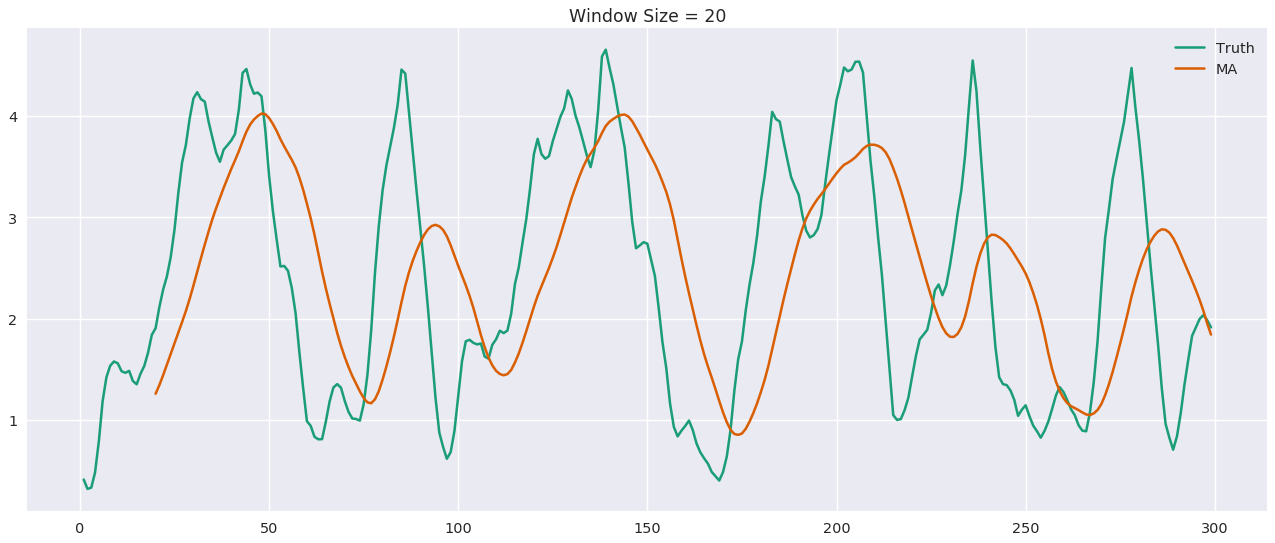

In [21]:
import seaborn as sns
train_data = dataset1['L_T1'][1:300]
test_data = dataset1['L_T1'][301:500]
sns.set(style='darkgrid', context='talk', palette='Dark2')
short_rolling = train_data.rolling(window=20).mean()
#short_rolling
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train_data)
plt.hold(True)
plt.plot(short_rolling)
plt.legend(['Truth','MA'])
plt.title('Window Size = 20')
plt.show()

/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/xin/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


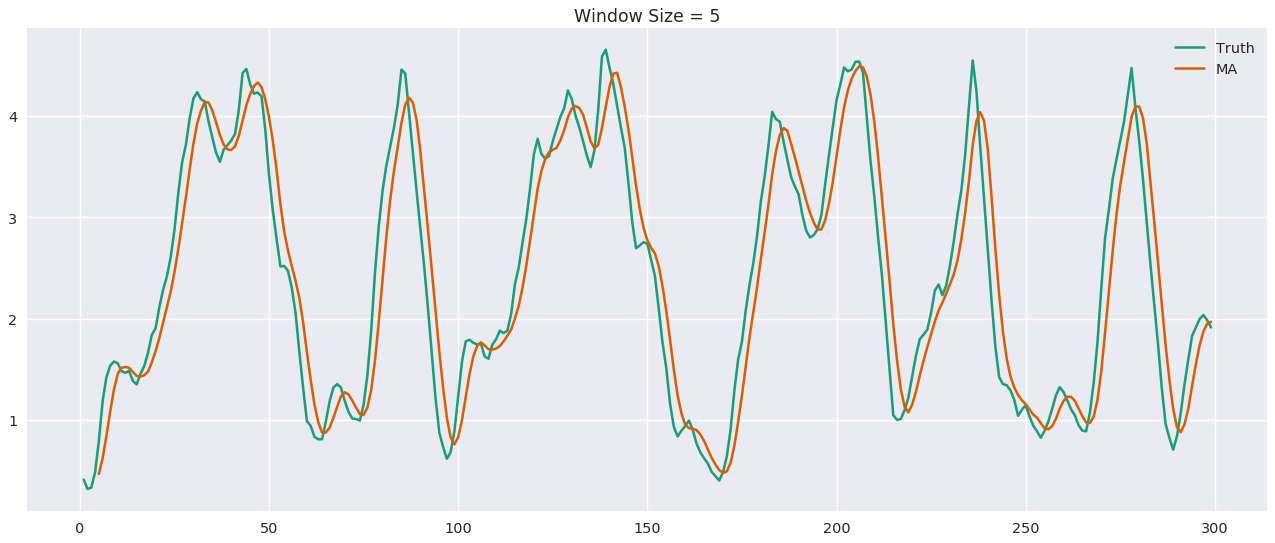

In [22]:
train_data = dataset1['L_T1'][1:300]
test_data = dataset1['L_T1'][301:500]
sns.set(style='darkgrid', context='talk', palette='Dark2')
short_rolling = train_data.rolling(window=5).mean()
#short_rolling
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train_data)
plt.hold(True)
plt.plot(short_rolling)
plt.legend(['Truth','MA'])
plt.title('Window Size = 5')
plt.show()